Kütüphaneleri eklemekle başlıyoruz.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, f1_score, precision_score
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import scale 

Veri çerçevemizi dahil ediyorum.

In [2]:
tablet = pd.read_csv("../input/tabletcsv/tablet.csv",sep=",") #Verilen csv dosyasında veriler virgülle ayrıldıkları için sep'i virgül olarak seçelim.
df=tablet.copy() #İşlem yaparken asıl dosyanın etkilenmemesi için kopyasını df değişkenine atayalım.

Veri çerçevesinin kaç öznitelik ve kaç gözlemleden oluştuğu bilgisine bakalım.

In [3]:
df.shape #Verimiz 20 Öznitelik 2000 adet gözlemden oluşmaktadır.

(2000, 20)

Veri çerçevesinin ilk 100 gözlemini görüntüleyelim.

In [4]:
df.head(100) #Verimizde ilk 100 elemanı görüntülüyorum.

BataryaGucu Bluetooth  MikroislemciHizi CiftHat  OnKameraMP   4G  \
0          1325       Yok               1.9     Yok         2.0  Yok   
1          1046       Var               2.8     Var         0.0  Var   
2           843       Yok               1.3     Var         1.0  Yok   
3           894       Yok               0.5     Var         1.0  Var   
4           936       Yok               1.0     Yok         1.0  Yok   
..          ...       ...               ...     ...         ...  ...   
95         1317       Yok               1.5     Yok         6.0  Yok   
96         1986       Yok               0.5     Var         3.0  Var   
97          771       Var               0.5     Yok         3.0  Yok   
98         1450       Yok               2.1     Yok         1.0  Yok   
99         1898       Yok               1.8     Var         3.0  Var   

    DahiliBellek  Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
0             50       0.1      146               1            10   
1             58       0.2      100               8             0   
2             16       0.9      119               7             4   
3             50       0.5      199               3            14   
4             18       0.2      153               3            18   
..           ...       ...      ...             ...           ...   
95            12       0.1      154               2             9   
96            51       0.1      165               8            20   
97            25       1.0       86               4             6   
98            31       0.6      114               5             4   
99            56       0.2      185               7             4   

    CozunurlukYükseklik  CozunurlukGenislik     RAM  BataryaOmru   3G  \
0                   499                 695  2328.0            2  Var   
1                   259                1040  3863.0            9  Var   
2                   593                 732  1734.0           14  Yok   
3                  1285                1462  3615.0            6  Var   
4                  1330                1686  2391.0            3  Var   
..                  ...                 ...     ...          ...  ...   
95                  431                 542   425.0           11  Var   
96                  282                1358  1614.0            3  Var   
97                  327                 922   770.0           20  Yok   
98                 1573                1639   794.0            9  Yok   
99                  444                 739  2114.0           19  Var   

   Dokunmatik WiFi FiyatAraligi     Renk  
0         Yok  Yok       Normal    Beyaz  
1         Var  Var       Pahalı    Pembe  
2         Yok  Var         Ucuz      Mor  
3         Yok  Var       Pahalı  Turuncu  
4         Var  Var       Normal    Beyaz  
..        ...  ...          ...      ...  
95        Var  Var     Çok Ucuz     Sarı  
96        Var  Var         Ucuz    Beyaz  
97        Var  Yok     Çok Ucuz    Siyah  
98        Var  Var         Ucuz     Mavi  
99        Var  Var       Normal    Siyah  

[100 rows x 20 columns]

Veri çerçevesindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.

In [5]:
df.info()  #Tüm değişkenlerde 2000 adet eksik olmayan veri var.Veri çerçevesi 20 sutündan oluşmaktadır.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

In [6]:
df.dtypes #Verilen özniteliklerin Data tiplerini görüntüledim.4 tane float64,8 tane int64 ve 8 object data tip bulunmaktadır.

BataryaGucu              int64
Bluetooth               object
MikroislemciHizi       float64
CiftHat                 object
OnKameraMP             float64
4G                      object
DahiliBellek             int64
Kalinlik               float64
Agirlik                  int64
CekirdekSayisi           int64
ArkaKameraMP             int64
CozunurlukYükseklik      int64
CozunurlukGenislik       int64
RAM                    float64
BataryaOmru              int64
3G                      object
Dokunmatik              object
WiFi                    object
FiyatAraligi            object
Renk                    object
dtype: object

Veri çerçevesinin son 100 gözlemini görüntüleyelim.

In [7]:
df.tail(100) #Veri çerçevesinin son 100 gözlemini görüntüledik.

BataryaGucu Bluetooth  MikroislemciHizi CiftHat  OnKameraMP   4G  \
1900         1772       Var               0.5     Var         3.0  Yok   
1901         1027       Var               0.8     Yok         7.0  Yok   
1902         1968       Yok               0.9     Yok         0.0  Yok   
1903         1488       Yok               0.5     Yok         1.0  Yok   
1904         1966       Yok               0.8     Var        15.0  Var   
...           ...       ...               ...     ...         ...  ...   
1995          689       Yok               2.9     Var         3.0  Var   
1996         1654       Yok               1.8     Yok         1.0  Yok   
1997          742       Yok               2.2     Var         4.0  Yok   
1998          704       Yok               2.2     Var         4.0  Yok   
1999         1872       Yok               0.5     Yok         5.0  Var   

      DahiliBellek  Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
1900            64       0.7      116               8            15   
1901            18       1.0      146               7            11   
1902            22       0.8      115               3             7   
1903            39       0.8      112               5             6   
1904            48       0.2      144               1            16   
...            ...       ...      ...             ...           ...   
1995             7       0.8      147               2             6   
1996            11       0.3      146               7             2   
1997            56       0.2      190               7            14   
1998            53       0.2      186               6             6   
1999            26       0.5      172               4            10   

      CozunurlukYükseklik  CozunurlukGenislik     RAM  BataryaOmru   3G  \
1900                  270                 545  1834.0           20  Yok   
1901                  338                 534  1234.0           14  Var   
1902                  861                1259  2323.0            7  Yok   
1903                 1528                1647  3054.0           19  Yok   
1904                 1242                1973  1252.0           19  Var   
...                   ...                 ...     ...          ...  ...   
1995                  487                 722  1241.0           16  Var   
1996                 1184                1719  1070.0           14  Var   
1997                  577                1359  3557.0           12  Yok   
1998                  251                1013  3653.0           15  Var   
1999                  672                1088  2273.0            8  Var   

     Dokunmatik WiFi FiyatAraligi        Renk  
1900        Var  Var         Ucuz       Siyah  
1901        Yok  Var     Çok Ucuz        Sarı  
1902        Yok  Var       Normal  Kahverengi  
1903        Yok  Yok       Pahalı        Mavi  
1904        Var  Var       Normal       Siyah  
...         ...  ...          ...         ...  
1995        Yok  Yok     Çok Ucuz       Siyah  
1996        Var  Var         Ucuz        Sarı  
1997        Var  Var       Pahalı     Turuncu  
1998        Var  Var       Normal     Turkuaz  
1999        Yok  Var       Normal       Siyah  

[100 rows x 20 columns]

Veri çerçevesinin rastgele 100 gözlemini görüntüleyelim.

In [8]:
df.sample(100) # Veri çerçevesinin rastgele 100 değişkeni yazdırdık.

BataryaGucu Bluetooth  MikroislemciHizi CiftHat  OnKameraMP   4G  \
1019         1584       Var               1.3     Yok         6.0  Yok   
1783         1430       Yok               0.5     Var         1.0  Yok   
1140         1266       Yok               0.5     Yok         0.0  Var   
316           768       Var               0.9     Yok        16.0  Var   
824           797       Var               2.9     Var         4.0  Yok   
...           ...       ...               ...     ...         ...  ...   
1420          754       Yok               0.5     Var         7.0  Var   
939           553       Yok               0.5     Var         2.0  Var   
360          1939       Var               2.8     Var         0.0  Var   
1972         1924       Yok               2.6     Yok         0.0  Var   
97            771       Var               0.5     Yok         3.0  Yok   

      DahiliBellek  Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
1019            41       0.6      135               4            15   
1783            27       0.5      183               1            16   
1140             5       0.1       95               6             9   
316             56       0.1      113               1            20   
824             38       0.5       90               4             6   
...            ...       ...      ...             ...           ...   
1420            59       0.7      178               7            10   
939             23       0.5      119               3             3   
360             55       0.6      199               4            10   
1972            59       0.9      136               6             0   
97              25       1.0       86               4             6   

      CozunurlukYükseklik  CozunurlukGenislik     RAM  BataryaOmru   3G  \
1019                  160                1291  1561.0           17  Yok   
1783                 1132                1182  2832.0           15  Yok   
1140                 1365                1698  1687.0           18  Var   
316                   418                 515   952.0           16  Var   
824                   763                1413   590.0            6  Yok   
...                   ...                 ...     ...          ...  ...   
1420                 1914                1928  1027.0            5  Var   
939                   993                1517  2981.0           14  Var   
360                   320                 520  1047.0           18  Var   
1972                 1438                1923  3646.0           16  Var   
97                    327                 922   770.0           20  Yok   

     Dokunmatik WiFi FiyatAraligi        Renk  
1019        Yok  Var         Ucuz  Kahverengi  
1783        Var  Var       Normal       Siyah  
1140        Yok  Yok       Normal       Pembe  
316         Yok  Var     Çok Ucuz       Beyaz  
824         Var  Yok     Çok Ucuz     Kırmızı  
...         ...  ...          ...         ...  
1420        Yok  Yok         Ucuz        Mavi  
939         Yok  Yok       Normal     Turuncu  
360         Var  Yok     Çok Ucuz        Mavi  
1972        Yok  Var       Pahalı       Beyaz  
97          Var  Yok     Çok Ucuz       Siyah  

[100 rows x 20 columns]

Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

Standart sapma ve ortalama değerlerden çıkarımda bulunarak hangi değişkenlerin ne kadar varyansa sahip olduğu hakkında fikir yürütelim.

In [9]:
df.describe().T #En büyük standart sapma RAM'dedir.Tabletlerin RAM'leri arasında farkın fazla olduğunu gösteriyor.
#En küçük standart sapma Kalinlik'tadır.Bu da bize kalınlıkları arasındaki farkın çok az olduğunu gösteriyor.
#Varyans standart sapmanın karesi olduğu için standart sapması en fazla olan RAM varyansı en büyük olanıdır.En küçük varyansa sahip olan ise standart sapması en küçük olan Kalınlık değişkenidir.

count         mean          std    min      25%     50%  \
BataryaGucu          2000.0  1238.518500   439.418206  501.0   851.75  1226.0   
MikroislemciHizi     2000.0     1.522250     0.816004    0.5     0.70     1.5   
OnKameraMP           1995.0     4.312281     4.342095    0.0     1.00     3.0   
DahiliBellek         2000.0    32.046500    18.145715    2.0    16.00    32.0   
Kalinlik             2000.0     0.501750     0.288416    0.1     0.20     0.5   
Agirlik              2000.0   140.249000    35.399655   80.0   109.00   141.0   
CekirdekSayisi       2000.0     4.520500     2.287837    1.0     3.00     4.0   
ArkaKameraMP         2000.0     9.916500     6.064315    0.0     5.00    10.0   
CozunurlukYükseklik  2000.0   645.108000   443.780811    0.0   282.75   564.0   
CozunurlukGenislik   2000.0  1251.515500   432.199447  500.0   874.75  1247.0   
RAM                  1988.0  2116.243964  1082.513059  256.0  1204.75  2129.5   
BataryaOmru          2000.0    11.011000     5.463955    2.0     6.00    11.0   

                         75%     max  
BataryaGucu          1615.25  1998.0  
MikroislemciHizi        2.20     3.0  
OnKameraMP              7.00    19.0  
DahiliBellek           48.00    64.0  
Kalinlik                0.80     1.0  
Agirlik               170.00   200.0  
CekirdekSayisi          7.00     8.0  
ArkaKameraMP           15.00    20.0  
CozunurlukYükseklik   947.25  1960.0  
CozunurlukGenislik   1633.00  1998.0  
RAM                  3049.50  3998.0  
BataryaOmru            16.00    20.0

Hedef değişken olan Fiyat aralığı değşkenime bağlı olarak tabletlerin özelliklerine göre ortalamalarını ve standart sapmalarını yazdıralım.

In [10]:
df.groupby(["FiyatAraligi"]).std()

BataryaGucu  MikroislemciHizi  OnKameraMP  DahiliBellek  \
FiyatAraligi                                                            
Normal         452.863065          0.804404    4.347390     18.441958   
Pahalı         414.992261          0.796450    4.332399     17.930377   
Ucuz           438.614528          0.814479    4.499432     18.000739   
Çok Ucuz       410.801305          0.848941    4.185411     18.101023   

              Kalinlik    Agirlik  CekirdekSayisi  ArkaKameraMP  \
FiyatAraligi                                                      
Normal        0.286215  34.320326        2.262546      5.952861   
Pahalı        0.291901  34.911994        2.297074      6.085521   
Ucuz          0.286895  35.678956        2.311684      6.124806   
Çok Ucuz      0.288184  36.378319        2.268544      6.095805   

              CozunurlukYükseklik  CozunurlukGenislik         RAM  BataryaOmru  
FiyatAraligi                                                                    
Normal                 445.789232          427.757151  496.211735     5.433070  
Pahalı                 483.720179          426.823571  390.975480     5.443129  
Ucuz                   441.351209          433.564352  465.850159     5.570729  
Çok Ucuz               372.824164          413.001780  362.755397     5.397009

In [11]:
df.groupby(["FiyatAraligi"]).mean()

BataryaGucu  MikroislemciHizi  OnKameraMP  DahiliBellek  \
FiyatAraligi                                                            
Normal           1228.320            1.5298    4.498000        30.920   
Pahalı           1379.984            1.5204    4.316000        33.976   
Ucuz             1228.868            1.4886    4.340000        32.116   
Çok Ucuz         1116.902            1.5502    4.092929        31.174   

              Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
FiyatAraligi                                                    
Normal          0.4908  143.614           4.682        10.018   
Pahalı          0.5020  136.320           4.502        10.150   
Ucuz            0.5240  140.510           4.298         9.924   
Çok Ucuz        0.4902  140.552           4.600         9.574   

              CozunurlukYükseklik  CozunurlukGenislik         RAM  BataryaOmru  
FiyatAraligi                                                                    
Normal                    632.284            1234.046  2582.81600       10.972  
Pahalı                    744.848            1369.838  3449.35041       11.098  
Ucuz                      666.892            1251.908  1679.49000       11.362  
Çok Ucuz                  536.408            1150.270   785.31400       10.612

Veri çerçevesinde hangi öznitelikte kaç adet eksik değer olduğunu gözlemleyelim.

In [12]:
df.count() #Değişkenlerden kaçar tane değer olduğunu bulduk.

BataryaGucu            2000
Bluetooth              2000
MikroislemciHizi       2000
CiftHat                2000
OnKameraMP             1995
4G                     2000
DahiliBellek           2000
Kalinlik               2000
Agirlik                2000
CekirdekSayisi         2000
ArkaKameraMP           2000
CozunurlukYükseklik    2000
CozunurlukGenislik     2000
RAM                    1988
BataryaOmru            2000
3G                     2000
Dokunmatik             2000
WiFi                   2000
FiyatAraligi           2000
Renk                   2000
dtype: int64

In [13]:
df.isnull().sum().sum() #Veri çerçevesinde 17 adet eksik değerimiz var.

17

In [14]:
df.isna().sum() #Veri çerçevesinde OnKamera 5,RAM'dan 12 eksik değer bulunmaktadır.

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

Değişkenlerin ortalamalarını inceleyelim.

In [15]:
df.mean()#En büyük ortalamaya sahip değişken RAM'ken en düşük ortalamaya da Kalinlik sahiptir.

BataryaGucu            1238.518500
MikroislemciHizi          1.522250
OnKameraMP                4.312281
DahiliBellek             32.046500
Kalinlik                  0.501750
Agirlik                 140.249000
CekirdekSayisi            4.520500
ArkaKameraMP              9.916500
CozunurlukYükseklik     645.108000
CozunurlukGenislik     1251.515500
RAM                    2116.243964
BataryaOmru              11.011000
dtype: float64

Değişkenlerin medyanını bulalım.

In [16]:
df.median()

BataryaGucu            1226.0
MikroislemciHizi          1.5
OnKameraMP                3.0
DahiliBellek             32.0
Kalinlik                  0.5
Agirlik                 141.0
CekirdekSayisi            4.0
ArkaKameraMP             10.0
CozunurlukYükseklik     564.0
CozunurlukGenislik     1247.0
RAM                    2129.5
BataryaOmru              11.0
dtype: float64

Değişkenlerin standart sapmalarını inceleyelim.

In [17]:
df.std() #Standart sapması yüksek olan çok fazla değişken olduğundan dolayı veri setinin dengesiz dağıldığını söyleyebiliriz.

BataryaGucu             439.418206
MikroislemciHizi          0.816004
OnKameraMP                4.342095
DahiliBellek             18.145715
Kalinlik                  0.288416
Agirlik                  35.399655
CekirdekSayisi            2.287837
ArkaKameraMP              6.064315
CozunurlukYükseklik     443.780811
CozunurlukGenislik      432.199447
RAM                    1082.513059
BataryaOmru               5.463955
dtype: float64

Kovaryansı inceleyelim.

In [18]:
df.cov() #Batarya gücü ile DahiliBellek,CekirdekSayisi,CozunurlukGenislik,RAM arasında negatif MikroislemciHizi,OnKameraMP,Kalinlik,Agirlik,ArkaKameraMP,CozunurlukYükseklik,BataryaOmru pozitif bir ilişki bulunmaktadır.
#Ön kamera MP ile MikroislemciHizi,DahiliBellek,Kalinlik,CekirdekSayisi,CozunurlukYükseklik,CozunurlukGenislik,BataryaOmru ile negatif BataryaGucu,Agirlik,ArkaKameraMP,RAM arasında pozitif bir ilişki bulunmaktadır.

BataryaGucu  MikroislemciHizi  OnKameraMP  \
BataryaGucu          193088.359838          4.116922   61.358674   
MikroislemciHizi          4.116922          0.665863   -0.000610   
OnKameraMP               61.358674         -0.000610   18.853786   
DahiliBellek            -31.923572          0.096914   -2.257164   
Kalinlik                  4.319702         -0.003381   -0.002159   
Agirlik                  28.689738          0.356738    3.776743   
CekirdekSayisi          -29.885322         -0.010686   -0.136295   
ArkaKameraMP             83.782186         -0.025955   16.992930   
CozunurlukYükseklik    2905.736870         -5.259133  -20.563638   
CozunurlukGenislik    -1595.644609         -3.341841  -10.606717   
RAM                    -420.183414          3.508705   58.814673   
BataryaOmru             126.075334         -0.050970   -0.168940   

                     DahiliBellek  Kalinlik      Agirlik  CekirdekSayisi  \
BataryaGucu            -31.923572  4.319702    28.689738      -29.885322   
MikroislemciHizi         0.096914 -0.003381     0.356738       -0.010686   
OnKameraMP              -2.257164 -0.002159     3.776743       -0.136295   
DahiliBellek           329.266971  0.036037   -21.977567       -1.175291   
Kalinlik                 0.036037  0.083184     0.222125       -0.002312   
Agirlik                -21.977567  0.222125  1253.135567       -1.537873   
CekirdekSayisi          -1.175291 -0.002312    -1.537873        5.234197   
ArkaKameraMP            -3.661448  0.045969     4.045314       -0.016547   
CozunurlukYükseklik     84.080518  3.233478    14.756486       -6.977203   
CozunurlukGenislik     -65.366654  2.937617     1.373327       24.205785   
RAM                    646.488662 -2.275414   -97.300434       13.808762   
BataryaOmru             -0.276650  0.026794     1.200861        0.164357   

                     ArkaKameraMP  CozunurlukYükseklik  CozunurlukGenislik  \
BataryaGucu             83.782186          2905.736870        -1595.644609   
MikroislemciHizi        -0.025955            -5.259133           -3.341841   
OnKameraMP              16.992930           -20.563638          -10.606717   
DahiliBellek            -3.661448            84.080518          -65.366654   
Kalinlik                 0.045969             3.233478            2.937617   
Agirlik                  4.045314            14.756486            1.373327   
CekirdekSayisi          -0.016547            -6.977203           24.205785   
ArkaKameraMP            36.775916           -49.694829           10.997543   
CozunurlukYükseklik    -49.694829        196941.408040        97946.365509   
CozunurlukGenislik      10.997543         97946.365509       186796.361941   
RAM                    193.941638        -11236.011282          982.199140   
BataryaOmru              0.485661           -25.812594           15.869264   

                              RAM  BataryaOmru  
BataryaGucu         -4.201834e+02   126.075334  
MikroislemciHizi     3.508705e+00    -0.050970  
OnKameraMP           5.881467e+01    -0.168940  
DahiliBellek         6.464887e+02    -0.276650  
Kalinlik            -2.275414e+00     0.026794  
Agirlik             -9.730043e+01     1.200861  
CekirdekSayisi       1.380876e+01     0.164357  
ArkaKameraMP         1.939416e+02     0.485661  
CozunurlukYükseklik -1.123601e+04   -25.812594  
CozunurlukGenislik   9.821991e+02    15.869264  
RAM                  1.171835e+06    61.786772  
BataryaOmru          6.178677e+01    29.854806

 Korelasyonu inceleyelim.

In [19]:
df.corr() #Buradaki en güçlü pozitif yönlü ilişki OnKameraMP ve ArkaKameraMP arasındadır.Korelasyonları 0.645697'tür.Korelasyon 1'e yaklaştıkça aralarındaki ilişki güçlenir.Fakat burda zayıf bir ilişki vardır.

BataryaGucu  MikroislemciHizi  OnKameraMP  DahiliBellek  \
BataryaGucu             1.000000          0.011482    0.032167     -0.004004   
MikroislemciHizi        0.011482          1.000000   -0.000172      0.006545   
OnKameraMP              0.032167         -0.000172    1.000000     -0.028642   
DahiliBellek           -0.004004          0.006545   -0.028642      1.000000   
Kalinlik                0.034085         -0.014364   -0.001723      0.006886   
Agirlik                 0.001844          0.012350    0.024585     -0.034214   
CekirdekSayisi         -0.029727         -0.005724   -0.013721     -0.028310   
ArkaKameraMP            0.031441         -0.005245    0.645697     -0.033273   
CozunurlukYükseklik     0.014901         -0.014523   -0.010662      0.010441   
CozunurlukGenislik     -0.008402         -0.009476   -0.005646     -0.008335   
RAM                    -0.000883          0.003969    0.012528      0.032883   
BataryaOmru             0.052510         -0.011432   -0.007121     -0.002790   

                     Kalinlik   Agirlik  CekirdekSayisi  ArkaKameraMP  \
BataryaGucu          0.034085  0.001844       -0.029727      0.031441   
MikroislemciHizi    -0.014364  0.012350       -0.005724     -0.005245   
OnKameraMP          -0.001723  0.024585       -0.013721      0.645697   
DahiliBellek         0.006886 -0.034214       -0.028310     -0.033273   
Kalinlik             1.000000  0.021756       -0.003504      0.026282   
Agirlik              0.021756  1.000000       -0.018989      0.018844   
CekirdekSayisi      -0.003504 -0.018989        1.000000     -0.001193   
ArkaKameraMP         0.026282  0.018844       -0.001193      1.000000   
CozunurlukYükseklik  0.025263  0.000939       -0.006872     -0.018465   
CozunurlukGenislik   0.023566  0.000090        0.024480      0.004196   
RAM                 -0.007293 -0.002536        0.005576      0.029540   
BataryaOmru          0.017003  0.006209        0.013148      0.014657   

                     CozunurlukYükseklik  CozunurlukGenislik       RAM  \
BataryaGucu                     0.014901           -0.008402 -0.000883   
MikroislemciHizi               -0.014523           -0.009476  0.003969   
OnKameraMP                     -0.010662           -0.005646  0.012528   
DahiliBellek                    0.010441           -0.008335  0.032883   
Kalinlik                        0.025263            0.023566 -0.007293   
Agirlik                         0.000939            0.000090 -0.002536   
CekirdekSayisi                 -0.006872            0.024480  0.005576   
ArkaKameraMP                   -0.018465            0.004196  0.029540   
CozunurlukYükseklik             1.000000            0.510664 -0.023421   
CozunurlukGenislik              0.510664            1.000000  0.002101   
RAM                            -0.023421            0.002101  1.000000   
BataryaOmru                    -0.010645            0.006720  0.010444   

                     BataryaOmru  
BataryaGucu             0.052510  
MikroislemciHizi       -0.011432  
OnKameraMP             -0.007121  
DahiliBellek           -0.002790  
Kalinlik                0.017003  
Agirlik                 0.006209  
CekirdekSayisi          0.013148  
ArkaKameraMP            0.014657  
CozunurlukYükseklik    -0.010645  
CozunurlukGenislik      0.006720  
RAM                     0.010444  
BataryaOmru             1.000000

Korelasyon katsayılarını daha iyi okuyabilmek için ısı haritası çizdirelim.

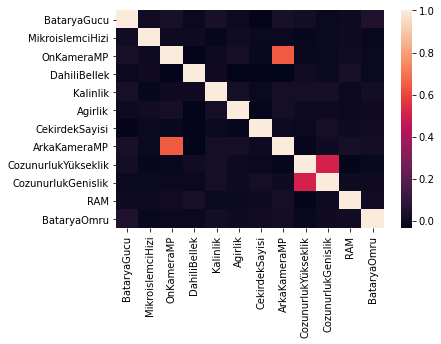

In [20]:
corr = df.corr() # Korelasyon ısı haritasını incelediğimizde korelasyon çok düşük. Aralarındaki ilişki çok zayıf.
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values); 

Hedef değişkenimiz olan FiyatAraligi'ni inceleyelim.

In [21]:
df.groupby(["FiyatAraligi"]).mean()

BataryaGucu  MikroislemciHizi  OnKameraMP  DahiliBellek  \
FiyatAraligi                                                            
Normal           1228.320            1.5298    4.498000        30.920   
Pahalı           1379.984            1.5204    4.316000        33.976   
Ucuz             1228.868            1.4886    4.340000        32.116   
Çok Ucuz         1116.902            1.5502    4.092929        31.174   

              Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
FiyatAraligi                                                    
Normal          0.4908  143.614           4.682        10.018   
Pahalı          0.5020  136.320           4.502        10.150   
Ucuz            0.5240  140.510           4.298         9.924   
Çok Ucuz        0.4902  140.552           4.600         9.574   

              CozunurlukYükseklik  CozunurlukGenislik         RAM  BataryaOmru  
FiyatAraligi                                                                    
Normal                    632.284            1234.046  2582.81600       10.972  
Pahalı                    744.848            1369.838  3449.35041       11.098  
Ucuz                      666.892            1251.908  1679.49000       11.362  
Çok Ucuz                  536.408            1150.270   785.31400       10.612

In [22]:
df.groupby(["FiyatAraligi"]).std()

BataryaGucu  MikroislemciHizi  OnKameraMP  DahiliBellek  \
FiyatAraligi                                                            
Normal         452.863065          0.804404    4.347390     18.441958   
Pahalı         414.992261          0.796450    4.332399     17.930377   
Ucuz           438.614528          0.814479    4.499432     18.000739   
Çok Ucuz       410.801305          0.848941    4.185411     18.101023   

              Kalinlik    Agirlik  CekirdekSayisi  ArkaKameraMP  \
FiyatAraligi                                                      
Normal        0.286215  34.320326        2.262546      5.952861   
Pahalı        0.291901  34.911994        2.297074      6.085521   
Ucuz          0.286895  35.678956        2.311684      6.124806   
Çok Ucuz      0.288184  36.378319        2.268544      6.095805   

              CozunurlukYükseklik  CozunurlukGenislik         RAM  BataryaOmru  
FiyatAraligi                                                                    
Normal                 445.789232          427.757151  496.211735     5.433070  
Pahalı                 483.720179          426.823571  390.975480     5.443129  
Ucuz                   441.351209          433.564352  465.850159     5.570729  
Çok Ucuz               372.824164          413.001780  362.755397     5.397009

In [23]:
df["FiyatAraligi"].nunique() #FiyatAraligi değişkeninin benzersiz değişken sayısını bulduk.

4

In [24]:
df["FiyatAraligi"].unique()# FiyatAraligi değişkeninin benzersiz değişkenlerinin neler olduğunu bulduk.

array(['Normal', 'Pahalı', 'Ucuz', 'Çok Ucuz'], dtype=object)

In [25]:
df["FiyatAraligi"].value_counts() #Her benzersiz değişkenden 500 tane olması düzenli bir dağılım olduğunu gösterir.

Çok Ucuz    500
Normal      500
Ucuz        500
Pahalı      500
Name: FiyatAraligi, dtype: int64

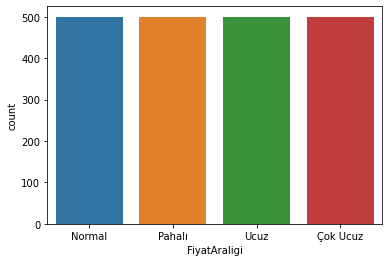

In [26]:
sns.countplot(df["FiyatAraligi"]) # Grafikte de görüldüğü üzere düzenli bir dağılım var. 

Sayısal ve kategorik değişkenler ideal tekniklerle ve araçlarla görselleştirerek önemli olduğu düşünülen kısımları yorumlayalım.

In [27]:
sns.set(rc={'figure.figsize':(8,6)}) 

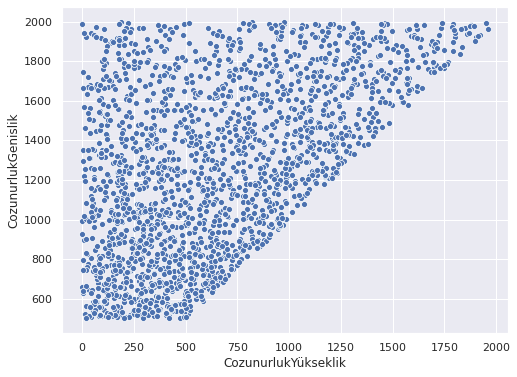

In [28]:
sns.scatterplot(x = "CozunurlukYükseklik", y = "CozunurlukGenislik", data = df);

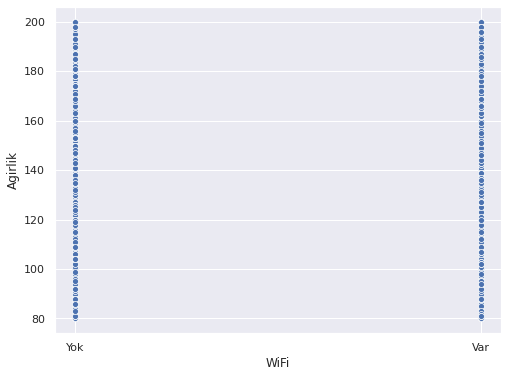

In [29]:
sns.scatterplot(x= "WiFi" , y="Agirlik" , data=df);#WiFi, Agirlik'i her harhangi bir şekilde etkilememektedir.

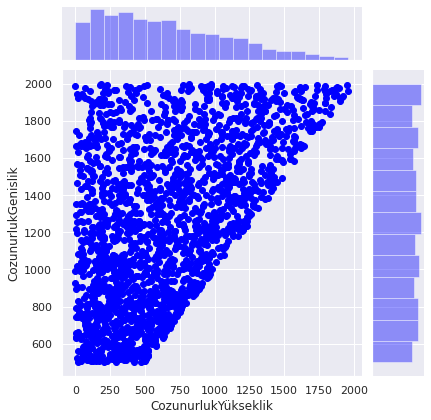

In [30]:
sns.jointplot(x = "CozunurlukYükseklik", y = "CozunurlukGenislik", data = df, color="blue");

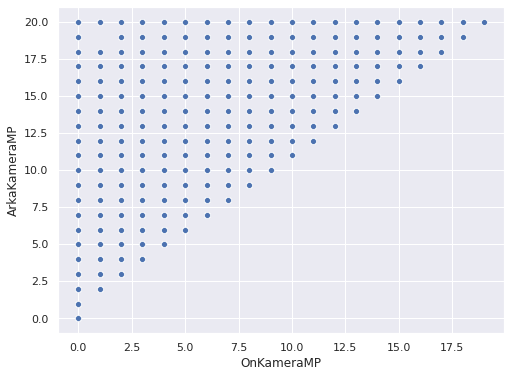

In [31]:
sns.scatterplot(x = "OnKameraMP", y = "ArkaKameraMP", data = df);

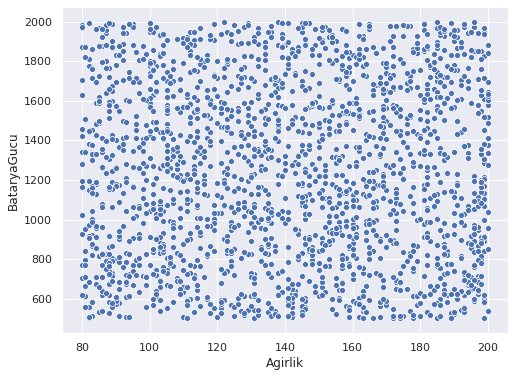

In [32]:
sns.scatterplot(df["Agirlik"],df["BataryaGucu"]) #Aralarında herhangi bir ilişki bulunmamaktadır.

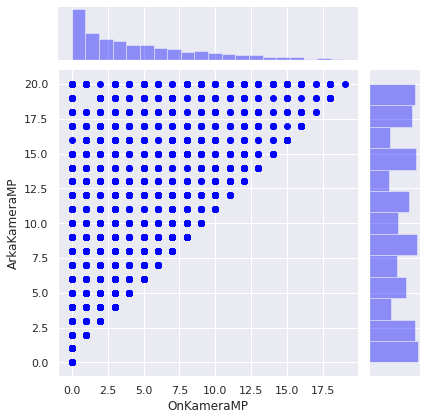

In [33]:
sns.jointplot(x = "OnKameraMP", y = "ArkaKameraMP", data = df, color="blue");

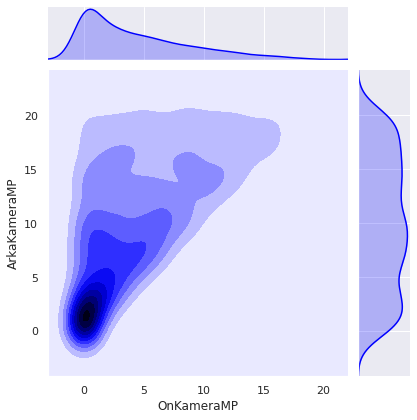

In [34]:
sns.jointplot(x = df["OnKameraMP"], y = df["ArkaKameraMP"], kind = "kde", color = "blue");

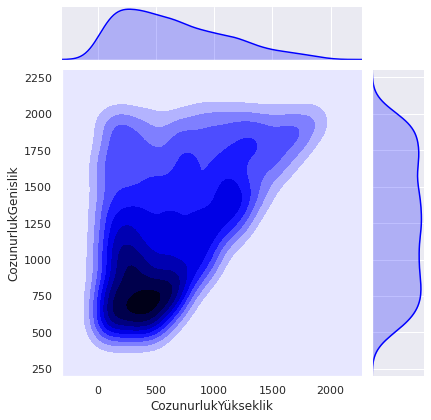

In [35]:
sns.jointplot(x = df["CozunurlukYükseklik"], y = df["CozunurlukGenislik"], kind = "kde", color = "blue");

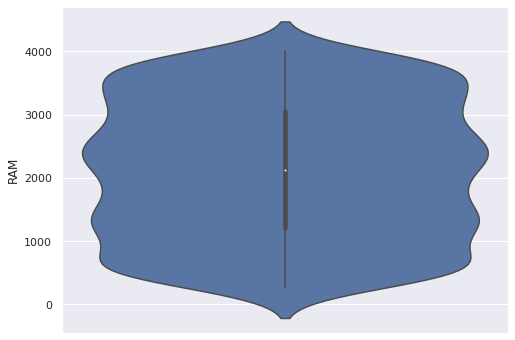

In [36]:
sns.violinplot(y = "RAM", data = df);

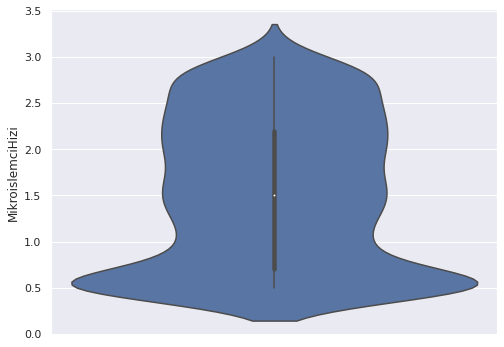

In [37]:
sns.violinplot(y = "MikroislemciHizi", data = df);

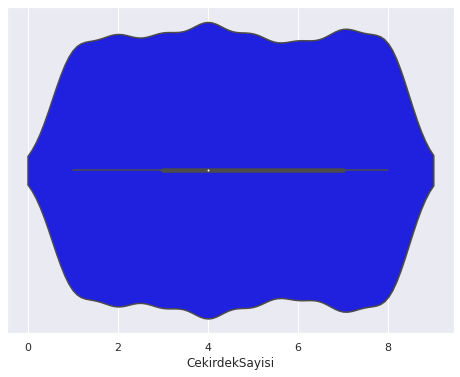

In [38]:
sns.violinplot(x=df["CekirdekSayisi"],color="blue"); #Dağılım,normal dağılım değildir.

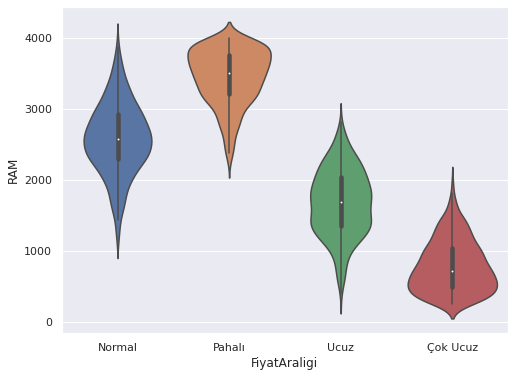

In [39]:
sns.violinplot(df["FiyatAraligi"],df["RAM"]) #Pahalı tabletlerin RAM'leri 2000 ile 4000,normal fiyatlı tabletlerin 1000 ile 4000,ucuz tabletlerin 0 ile 3000 ve çok ucuz tabletlerin ise 0 ile 2000 arasındadır. 

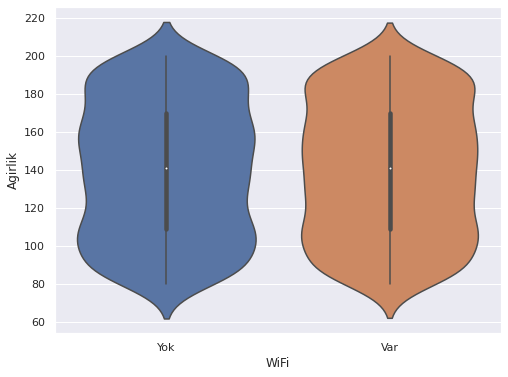

In [40]:
sns.violinplot(x= "WiFi" , y="Agirlik" , data=df); #WiFi, Agirlik'i her harhangi bir şekilde etkilememektedir.

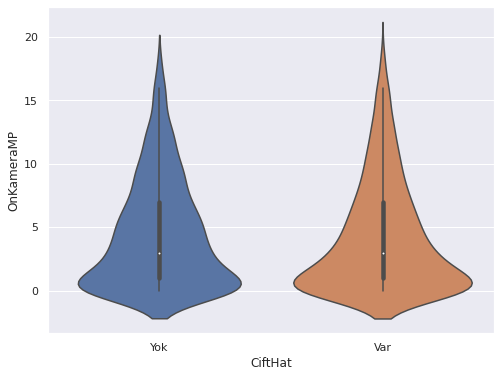

In [41]:
sns.violinplot(x = "CiftHat" , y ="OnKameraMP" , data = df);#Çift hatın olup olmaması ile önKameraMP arasında bir ilişki yoktur.

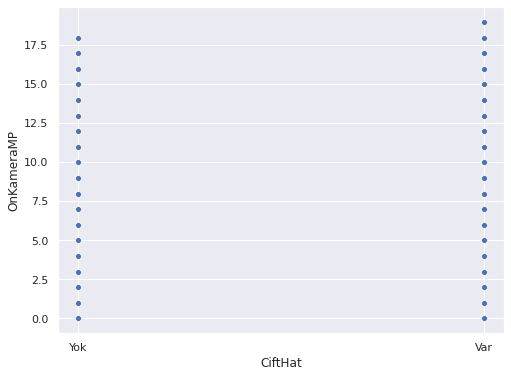

In [42]:
sns.scatterplot(x = "CiftHat" , y ="OnKameraMP" , data = df);

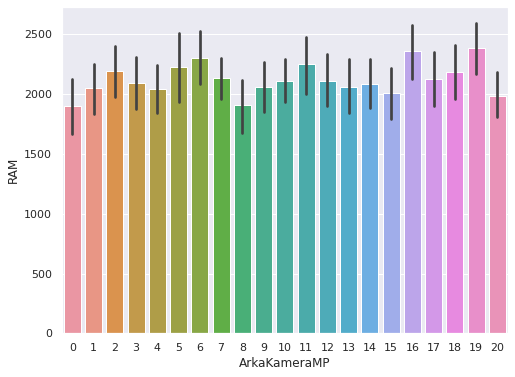

In [43]:
sns.barplot(x ="ArkaKameraMP" , y = "RAM" , data = df);

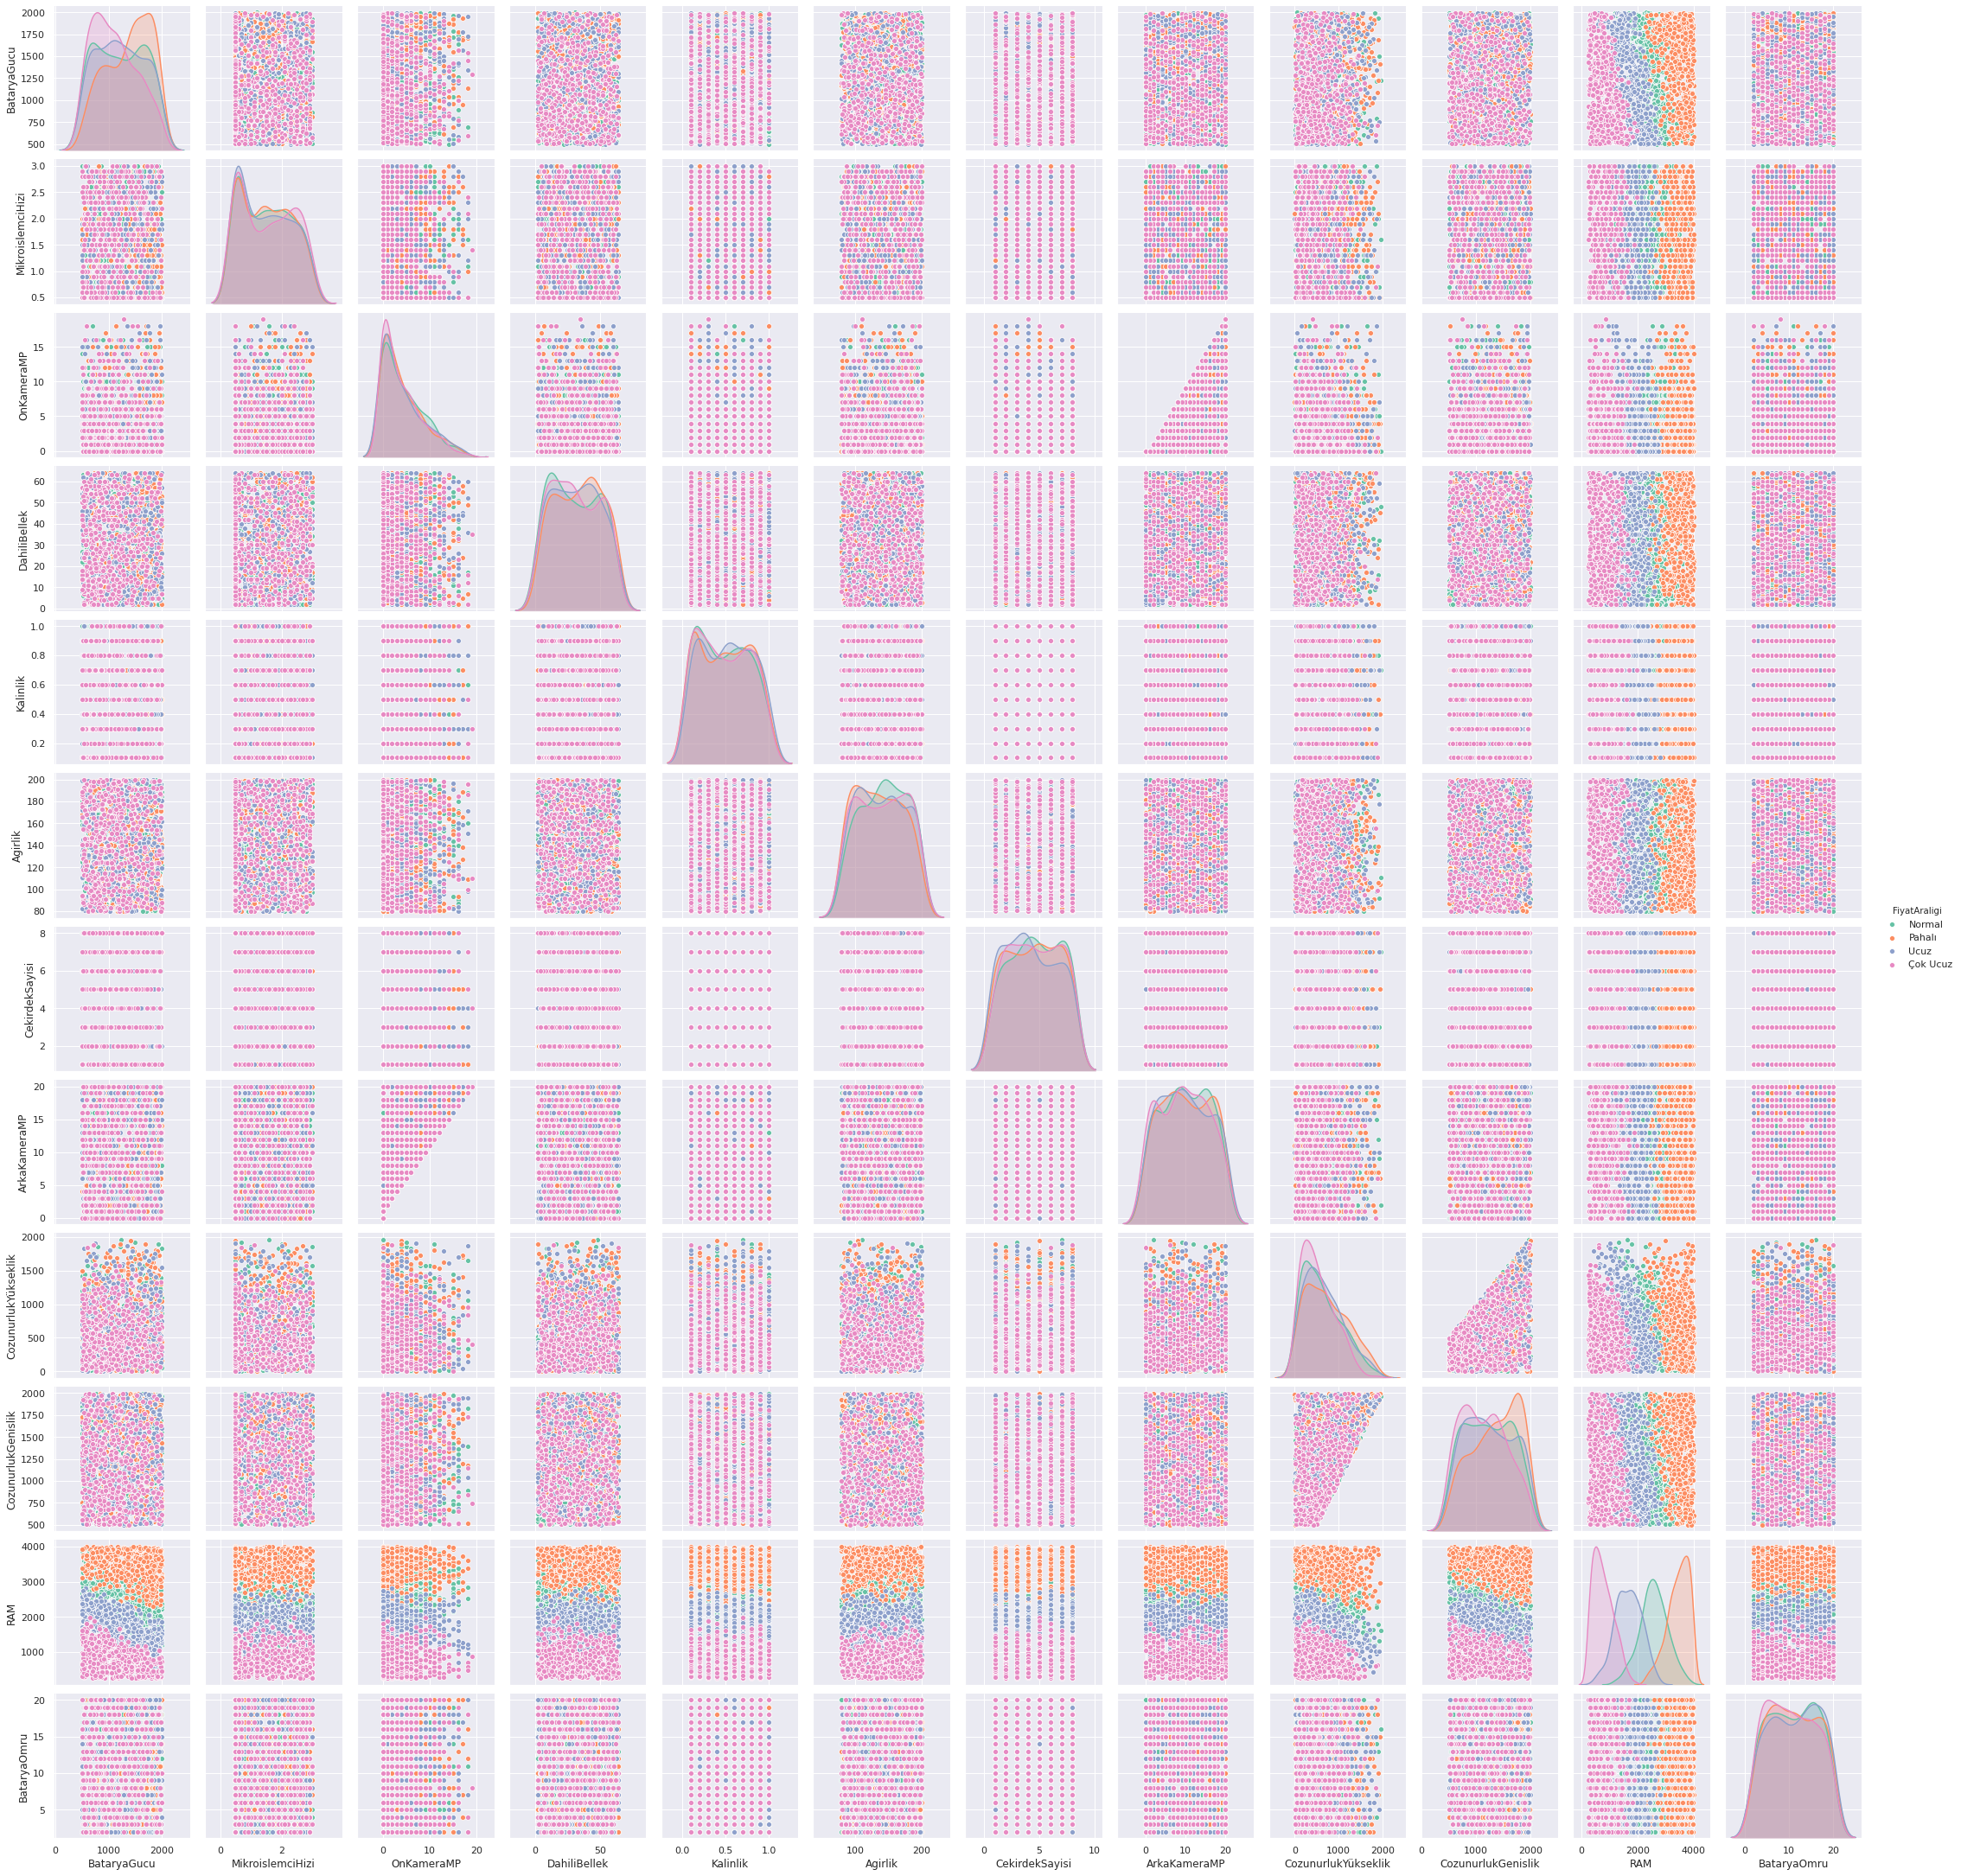

In [44]:
sns.pairplot(df, hue = "FiyatAraligi", palette="Set2");

Sayısal değişkenlerin dağılımını görmek için df üzerinden histogram çizdirelim.

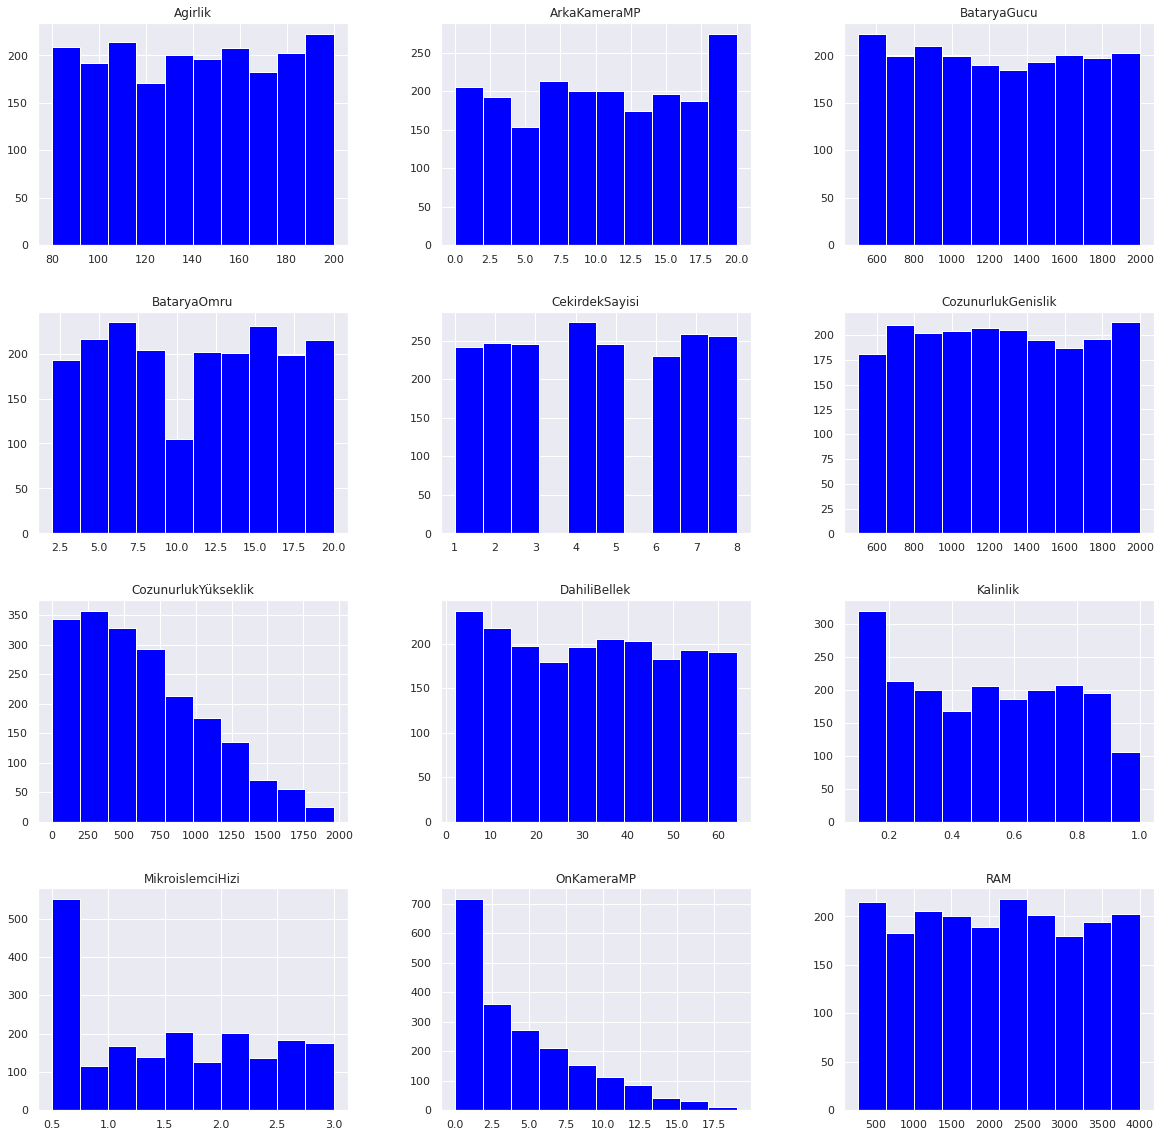

In [45]:
df.hist(figsize =(20,20), color = "blue")
plt.show()

Projemizin eksik verileri tespit etme ve eksik verileri doldurma olan ikinci safhasına geçmek için gerekli olan kütüphanlerimizi eklemekle başlayalım.

In [46]:
import missingno                    # Eksik verileri daha iyi okumak için kullandığımız kütüphanemizdir.
from sklearn import preprocessing   # Ön işleme aşamasında label encoding vb. için dahil ettiğimiz kütüphanemizdir.
import re                           # Düzenli ifadeler kullanmak için dahil ettiğimiz kütüphanemizdir.

Veri çerçevesinde hangi öznitelikte kaç adet eksik değer olduğunu gözlemleyelim.

In [47]:
df.isnull().sum().sum() #Veri çerçevesinde 17 adet eksik değerimiz var.

17

In [48]:
df.isnull().sum()#OnKameraMP'de 5 adet , RAM değişkenimde ise 12 adet eksik verim bulunmaktadır.

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

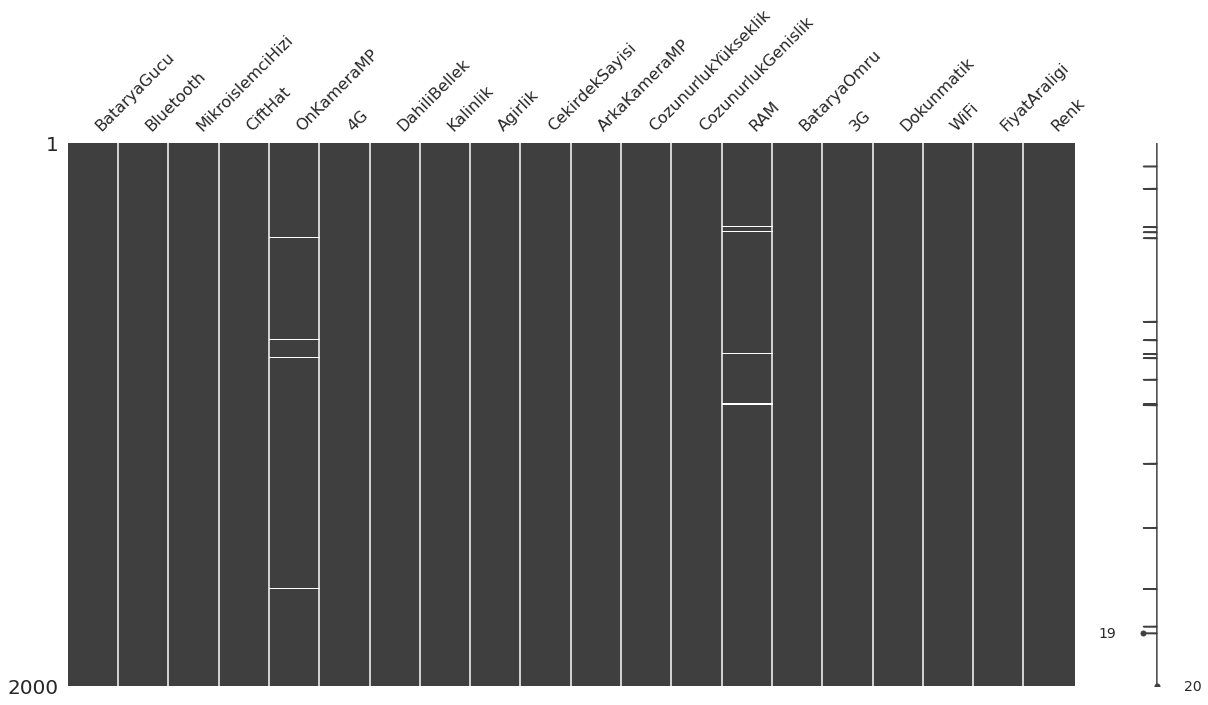

In [49]:
missingno.matrix(df,figsize=(20, 10)); # Veri setini incelediğimizde çok fazla eksik değerin olmadığını görürüz.

Eksik değer barındıran değişkebler arasında anlamlı birilişki olup olmadığına bakalım.

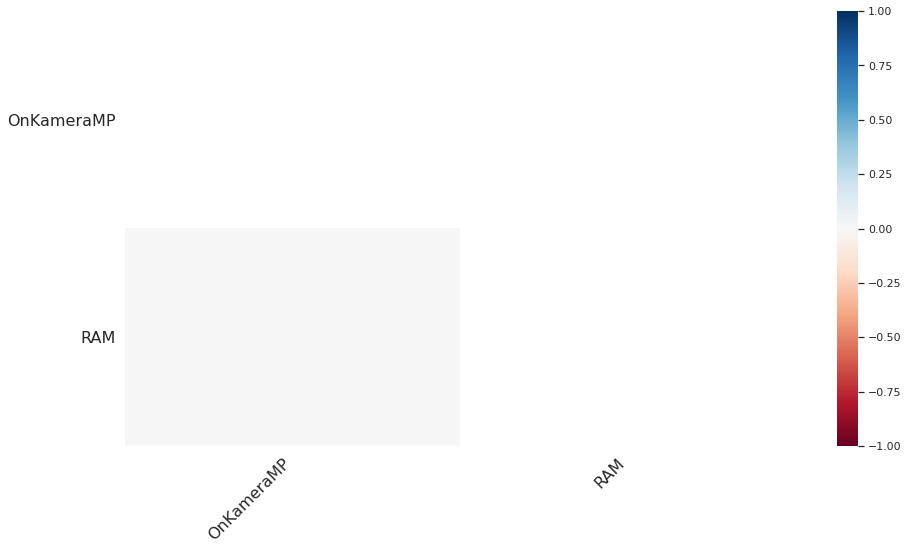

In [50]:
missingno.heatmap(df, figsize= (15,8));# RAM ve OnKameraMP değişkenlerinin aynı gözlemde eksik veri barındırmadığını söyleyebiliriz.Aralarında nötr(ilişki yok) denilebilir.

"Eksik gözlemler toplam gözlem sayısının yüzde kaçına tekabül eder?"sorunun yanıtını bulmak için fonksiyon yazalım.

In [51]:
def eksik_deger_tablosu(df): 
    eksik_deger = df.isnull().sum()
    eksik_deger_yuzde = 100 * df.isnull().sum()/len(df)
    eksik_deger_tablo = pd.concat([eksik_deger, eksik_deger_yuzde], axis=1)
    eksik_deger_tablo_son = eksik_deger_tablo.rename(columns = {0 : 'Eksik Değerler', 1 : '% Değeri'})
    return eksik_deger_tablo_son

In [52]:
eksik_deger_tablosu(df)#Bu iki değişkenimizde eksik olan gözlemler çok az olup ArkaKameraMP'de bu oran %0.25 iken RAM'de ise %0.60'dır.

Eksik Değerler  % Değeri
BataryaGucu                       0      0.00
Bluetooth                         0      0.00
MikroislemciHizi                  0      0.00
CiftHat                           0      0.00
OnKameraMP                        5      0.25
4G                                0      0.00
DahiliBellek                      0      0.00
Kalinlik                          0      0.00
Agirlik                           0      0.00
CekirdekSayisi                    0      0.00
ArkaKameraMP                      0      0.00
CozunurlukYükseklik               0      0.00
CozunurlukGenislik                0      0.00
RAM                              12      0.60
BataryaOmru                       0      0.00
3G                                0      0.00
Dokunmatik                        0      0.00
WiFi                              0      0.00
FiyatAraligi                      0      0.00
Renk                              0      0.00

RAM değişkenimizii inceleyelim.

In [53]:
df["RAM"].unique()

array([2328., 3863., 1734., ..., 3557., 3653., 2273.])

In [54]:
df[df["RAM"].isnull()] # RAM değişkeninde eksik olan gözlemlere baktığımızda NaN olduğunu görüyoruz.

BataryaGucu Bluetooth  MikroislemciHizi CiftHat  OnKameraMP   4G  \
87           1062       Var               2.5     Var         6.0  Yok   
169          1944       Var               1.8     Var         0.0  Var   
310          1479       Var               1.8     Var         0.0  Var   
329          1035       Yok               0.6     Var         2.0  Var   
658           732       Var               1.3     Yok         5.0  Var   
777           753       Var               0.5     Yok        11.0  Var   
871          1035       Var               2.7     Yok         1.0  Yok   
961          1949       Yok               1.3     Var         0.0  Yok   
965          1786       Yok               1.2     Yok        11.0  Yok   
1180         1369       Var               1.8     Var         6.0  Yok   
1779         1701       Var               0.5     Yok        13.0  Var   
1804         1370       Yok               1.4     Yok         5.0  Var   

      DahiliBellek  Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
87              10       0.9      160               1            13   
169             31       0.8       87               4            10   
310             24       0.1      146               6             0   
329             44       0.5       99               3             3   
658             32       0.4      163               8             7   
777             48       0.1      121               8            20   
871             40       0.2      157               5            15   
961             23       0.1      101               5             1   
965             61       0.1      123               3            14   
1180            34       0.5      162               1             7   
1779            46       0.9      115               2            15   
1804             6       0.2      158               6             8   

      CozunurlukYükseklik  CozunurlukGenislik  RAM  BataryaOmru   3G  \
87                   1596                1807  NaN           16  Yok   
169                  1111                1362  NaN            8  Var   
310                   327                 645  NaN            5  Var   
329                   236                1960  NaN           12  Var   
658                  1661                1836  NaN            5  Var   
777                   606                1316  NaN           16  Var   
871                   757                1912  NaN            5  Yok   
961                   839                1136  NaN           20  Var   
965                    74                 865  NaN           17  Yok   
1180                  553                 727  NaN           18  Yok   
1779                  364                 828  NaN           10  Var   
1804                 1392                1783  NaN           11  Var   

     Dokunmatik WiFi FiyatAraligi        Renk  
87          Yok  Var       Pahalı         Gri  
169         Yok  Yok       Pahalı       Beyaz  
310         Yok  Yok       Pahalı     Turuncu  
329         Var  Yok       Pahalı       Beyaz  
658         Yok  Var       Pahalı       Siyah  
777         Yok  Yok       Pahalı     Turkuaz  
871         Var  Var       Pahalı     Turuncu  
961         Yok  Yok       Pahalı        Sarı  
965         Var  Yok       Pahalı  Kahverengi  
1180        Var  Var       Pahalı     Turuncu  
1779        Var  Yok       Pahalı       Yeşil  
1804        Var  Yok       Pahalı     Turkuaz

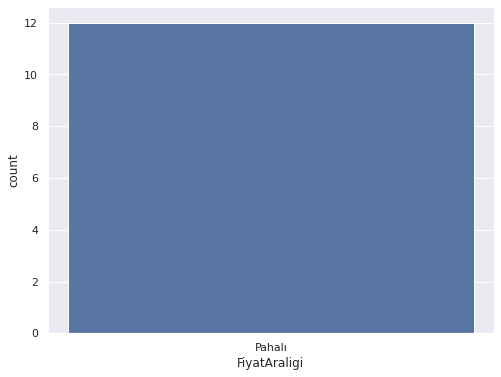

In [55]:
sns.countplot(df[df["RAM"].isnull()]["FiyatAraligi"]); #Eksik olan RAM değişkenini FiyatAraligi değişkenine göre incelediğimizde tek bir özelliğe bağlı olduğunu görüyoruz.RAM değişkeninin eksik değer içermesi fiyatının pahalı olmasından dolayı olabilir.

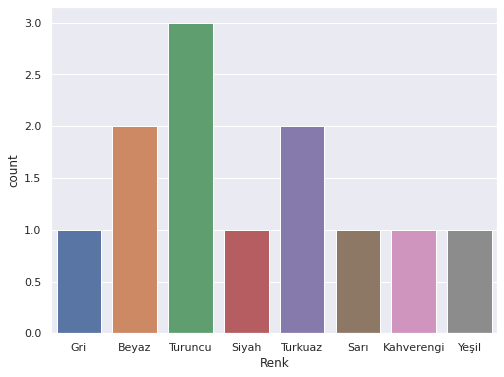

In [56]:
sns.countplot(df[df["RAM"].isnull()]["Renk"]); # Renk değişkenine göre incelediğimizde de en çok turuncu renkte eksik değer içerdiğini görüryoruz.

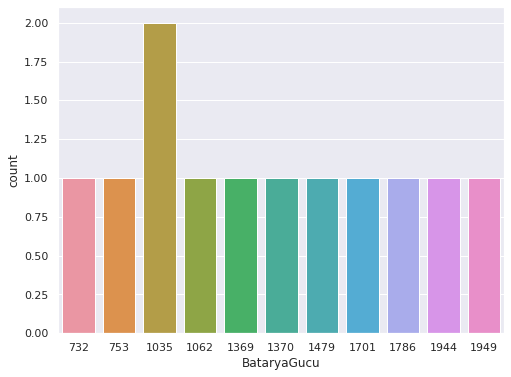

In [57]:
sns.countplot(df[df["RAM"].isnull()]["BataryaGucu"]) # BataryaGucu değişkenine göre incelediğimizde 1035 değer içok etkili gözüküyor.

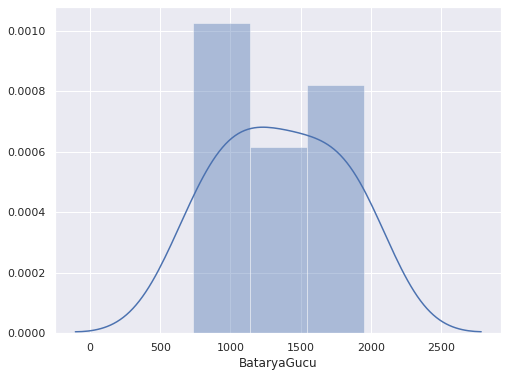

In [58]:
sns.distplot(df[df["RAM"].isnull()]["BataryaGucu"]);

Yukarıdaki grafiklerden de yola çıkarak RAM değişkeninin eksik değer içermesinde en etkili rolü tabletlerin pahalı olması oynuyor.

OnKameraMP değişkenini inceleyelim.

In [59]:
df["OnKameraMP"].unique()

array([ 2.,  0.,  1., 12.,  9., 10.,  4.,  7., 13., 11.,  5.,  3.,  6.,
        8., 14., 16., 18., 15., nan, 19., 17.])

In [60]:
df[df["OnKameraMP"].isnull()] # OnKameraMP değişkeninde eksik olan gözlemlere baktığımızda  NaN olduğunu görüyoruz.

BataryaGucu Bluetooth  MikroislemciHizi CiftHat  OnKameraMP   4G  \
351           726       Yok               2.2     Yok         NaN  Var   
726          1296       Yok               0.9     Var         NaN  Var   
792           504       Yok               2.8     Var         NaN  Yok   
1416         1617       Var               2.4     Yok         NaN  Var   
1641          763       Yok               1.7     Var         NaN  Var   

      DahiliBellek  Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
351             40       0.8       94               4            20   
726             14       0.5      124               5             3   
792             40       0.5      178               3             0   
1416            36       0.8       85               1             9   
1641             2       0.5       92               8            14   

      CozunurlukYükseklik  CozunurlukGenislik     RAM  BataryaOmru   3G  \
351                   323                 978  1342.0            4  Var   
726                   811                1272   490.0            4  Var   
792                   626                1195   470.0           16  Var   
1416                  743                1426   296.0            7  Var   
1641                 1028                1186  1050.0            8  Var   

     Dokunmatik WiFi FiyatAraligi   Renk  
351         Var  Var     Çok Ucuz  Beyaz  
726         Var  Var     Çok Ucuz   Sarı  
792         Yok  Yok     Çok Ucuz  Siyah  
1416        Yok  Yok     Çok Ucuz   Sarı  
1641        Var  Yok     Çok Ucuz  Siyah

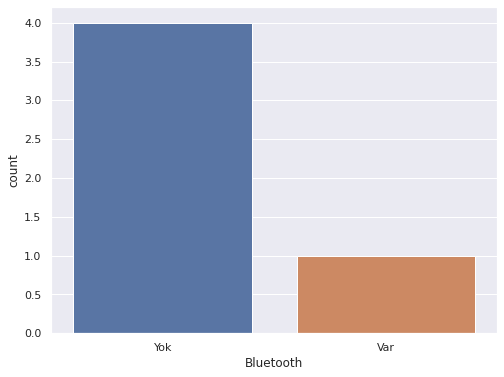

In [61]:
sns.countplot(df[df["OnKameraMP"].isnull()]["Bluetooth"])

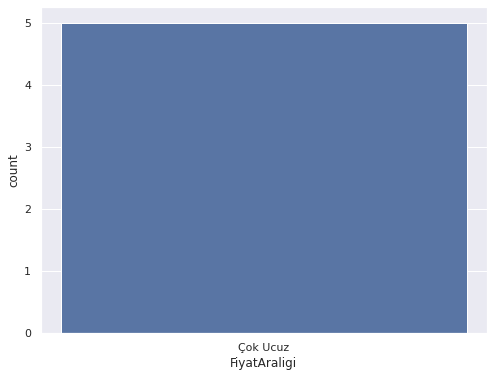

In [62]:
sns.countplot(df[df["OnKameraMP"].isnull()]["FiyatAraligi"]) #Grafiğe bakınca fiyatı çok ucuz olduğu için eksik değer girilmiş olabilir.

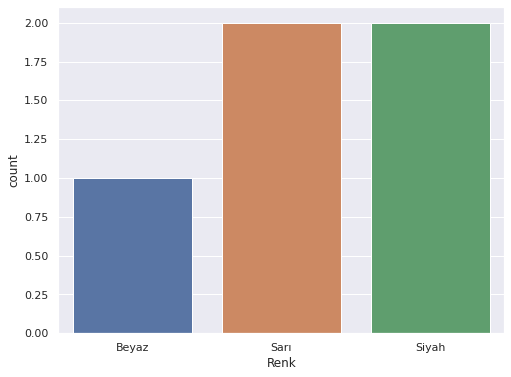

In [63]:
sns.countplot(df[df["OnKameraMP"].isnull()]["Renk"]) 

In [64]:
df.groupby("FiyatAraligi").mean() # FiyatAraligi değişkenine göre ortalamaları bulduk. 

BataryaGucu  MikroislemciHizi  OnKameraMP  DahiliBellek  \
FiyatAraligi                                                            
Normal           1228.320            1.5298    4.498000        30.920   
Pahalı           1379.984            1.5204    4.316000        33.976   
Ucuz             1228.868            1.4886    4.340000        32.116   
Çok Ucuz         1116.902            1.5502    4.092929        31.174   

              Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
FiyatAraligi                                                    
Normal          0.4908  143.614           4.682        10.018   
Pahalı          0.5020  136.320           4.502        10.150   
Ucuz            0.5240  140.510           4.298         9.924   
Çok Ucuz        0.4902  140.552           4.600         9.574   

              CozunurlukYükseklik  CozunurlukGenislik         RAM  BataryaOmru  
FiyatAraligi                                                                    
Normal                    632.284            1234.046  2582.81600       10.972  
Pahalı                    744.848            1369.838  3449.35041       11.098  
Ucuz                      666.892            1251.908  1679.49000       11.362  
Çok Ucuz                  536.408            1150.270   785.31400       10.612

RAM değişkenimizin eksik verilerini doldurmaya başlayalım.

In [65]:
df.groupby("FiyatAraligi")[["RAM"]].mean()

RAM
FiyatAraligi            
Normal        2582.81600
Pahalı        3449.35041
Ucuz          1679.49000
Çok Ucuz       785.31400

In [66]:
df[(df["FiyatAraligi"] == "Pahalı") & (df["RAM"].isnull())]

BataryaGucu Bluetooth  MikroislemciHizi CiftHat  OnKameraMP   4G  \
87           1062       Var               2.5     Var         6.0  Yok   
169          1944       Var               1.8     Var         0.0  Var   
310          1479       Var               1.8     Var         0.0  Var   
329          1035       Yok               0.6     Var         2.0  Var   
658           732       Var               1.3     Yok         5.0  Var   
777           753       Var               0.5     Yok        11.0  Var   
871          1035       Var               2.7     Yok         1.0  Yok   
961          1949       Yok               1.3     Var         0.0  Yok   
965          1786       Yok               1.2     Yok        11.0  Yok   
1180         1369       Var               1.8     Var         6.0  Yok   
1779         1701       Var               0.5     Yok        13.0  Var   
1804         1370       Yok               1.4     Yok         5.0  Var   

      DahiliBellek  Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
87              10       0.9      160               1            13   
169             31       0.8       87               4            10   
310             24       0.1      146               6             0   
329             44       0.5       99               3             3   
658             32       0.4      163               8             7   
777             48       0.1      121               8            20   
871             40       0.2      157               5            15   
961             23       0.1      101               5             1   
965             61       0.1      123               3            14   
1180            34       0.5      162               1             7   
1779            46       0.9      115               2            15   
1804             6       0.2      158               6             8   

      CozunurlukYükseklik  CozunurlukGenislik  RAM  BataryaOmru   3G  \
87                   1596                1807  NaN           16  Yok   
169                  1111                1362  NaN            8  Var   
310                   327                 645  NaN            5  Var   
329                   236                1960  NaN           12  Var   
658                  1661                1836  NaN            5  Var   
777                   606                1316  NaN           16  Var   
871                   757                1912  NaN            5  Yok   
961                   839                1136  NaN           20  Var   
965                    74                 865  NaN           17  Yok   
1180                  553                 727  NaN           18  Yok   
1779                  364                 828  NaN           10  Var   
1804                 1392                1783  NaN           11  Var   

     Dokunmatik WiFi FiyatAraligi        Renk  
87          Yok  Var       Pahalı         Gri  
169         Yok  Yok       Pahalı       Beyaz  
310         Yok  Yok       Pahalı     Turuncu  
329         Var  Yok       Pahalı       Beyaz  
658         Yok  Var       Pahalı       Siyah  
777         Yok  Yok       Pahalı     Turkuaz  
871         Var  Var       Pahalı     Turuncu  
961         Yok  Yok       Pahalı        Sarı  
965         Var  Yok       Pahalı  Kahverengi  
1180        Var  Var       Pahalı     Turuncu  
1779        Var  Yok       Pahalı       Yeşil  
1804        Var  Yok       Pahalı     Turkuaz

In [67]:
Pahali_RAM = df[(df["FiyatAraligi"] == "Pahalı") & (df["RAM"].isnull())].index
Pahali_RAM

Int64Index([87, 169, 310, 329, 658, 777, 871, 961, 965, 1180, 1779, 1804], dtype='int64')

In [68]:
df.loc[Pahali_RAM ,"RAM"] = 3500#".loc" yardımıyla ilk parametremizi indisler, ikinci parametremizi ise öznitelik girerek 3500 ile doldurduk.

In [69]:
df.isna().sum()["RAM"] #Böylece RAM değişkeninin eksik değerleri doldurmuş olduk.

0

OnKameraMP değişkenimizin eksik değerlerini dolduralım.

In [70]:
df.groupby("FiyatAraligi")[["OnKameraMP"]].mean()

OnKameraMP
FiyatAraligi            
Normal          4.498000
Pahalı          4.316000
Ucuz            4.340000
Çok Ucuz        4.092929

In [71]:
df[(df["FiyatAraligi"] == "Çok Ucuz") & (df["OnKameraMP"].isnull())]

BataryaGucu Bluetooth  MikroislemciHizi CiftHat  OnKameraMP   4G  \
351           726       Yok               2.2     Yok         NaN  Var   
726          1296       Yok               0.9     Var         NaN  Var   
792           504       Yok               2.8     Var         NaN  Yok   
1416         1617       Var               2.4     Yok         NaN  Var   
1641          763       Yok               1.7     Var         NaN  Var   

      DahiliBellek  Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
351             40       0.8       94               4            20   
726             14       0.5      124               5             3   
792             40       0.5      178               3             0   
1416            36       0.8       85               1             9   
1641             2       0.5       92               8            14   

      CozunurlukYükseklik  CozunurlukGenislik     RAM  BataryaOmru   3G  \
351                   323                 978  1342.0            4  Var   
726                   811                1272   490.0            4  Var   
792                   626                1195   470.0           16  Var   
1416                  743                1426   296.0            7  Var   
1641                 1028                1186  1050.0            8  Var   

     Dokunmatik WiFi FiyatAraligi   Renk  
351         Var  Var     Çok Ucuz  Beyaz  
726         Var  Var     Çok Ucuz   Sarı  
792         Yok  Yok     Çok Ucuz  Siyah  
1416        Yok  Yok     Çok Ucuz   Sarı  
1641        Var  Yok     Çok Ucuz  Siyah

In [72]:
OnKamera_Bos = df[(df["FiyatAraligi"] == "Çok Ucuz") & (df["OnKameraMP"].isnull())].index
OnKamera_Bos 

Int64Index([351, 726, 792, 1416, 1641], dtype='int64')

In [73]:
df.loc[OnKamera_Bos ,"OnKameraMP"] = 4 # OnKameraMP değişkenimizi çok ucuz kategorisinin ortalaması olan 4 ile dolduruyoruz.

In [74]:
df.isna().sum()["OnKameraMP"] #Böylece OnKameraMP değişkenimizin eksik değerlerini doldurduk.

0

In [75]:
df["RAM"].unique()

array([2328., 3863., 1734., ..., 3557., 3653., 2273.])

In [76]:
df["OnKameraMP"].unique()

array([ 2.,  0.,  1., 12.,  9., 10.,  4.,  7., 13., 11.,  5.,  3.,  6.,
        8., 14., 16., 18., 15., 19., 17.])

In [77]:
df.isna().sum() #Verisetini incelediğimizde eksik değerin kalmadığını görürürüz.

BataryaGucu            0
Bluetooth              0
MikroislemciHizi       0
CiftHat                0
OnKameraMP             0
4G                     0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
3G                     0
Dokunmatik             0
WiFi                   0
FiyatAraligi           0
Renk                   0
dtype: int64

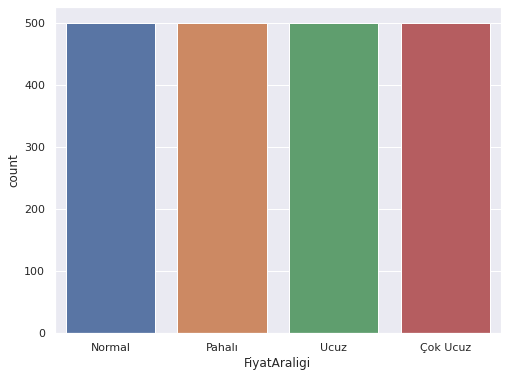

In [78]:
sns.countplot(df["FiyatAraligi"]); 

Son olarak projemizin son safhasını tamamlayacağız.

Değişkenleri bilgisayarın anladığı dil olan 1 ve 0'a çevireceğiz.1:var,0:yok

In [79]:
label_encoder = preprocessing.LabelEncoder()

In [80]:
df['CiftHat'] = label_encoder.fit_transform(df['CiftHat'])#İlk değer 1 yapıldı.
df.head()

BataryaGucu Bluetooth  MikroislemciHizi  CiftHat  OnKameraMP   4G  \
0         1325       Yok               1.9        1         2.0  Yok   
1         1046       Var               2.8        0         0.0  Var   
2          843       Yok               1.3        0         1.0  Yok   
3          894       Yok               0.5        0         1.0  Var   
4          936       Yok               1.0        1         1.0  Yok   

   DahiliBellek  Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
0            50       0.1      146               1            10   
1            58       0.2      100               8             0   
2            16       0.9      119               7             4   
3            50       0.5      199               3            14   
4            18       0.2      153               3            18   

   CozunurlukYükseklik  CozunurlukGenislik     RAM  BataryaOmru   3G  \
0                  499                 695  2328.0            2  Var   
1                  259                1040  3863.0            9  Var   
2                  593                 732  1734.0           14  Yok   
3                 1285                1462  3615.0            6  Var   
4                 1330                1686  2391.0            3  Var   

  Dokunmatik WiFi FiyatAraligi     Renk  
0        Yok  Yok       Normal    Beyaz  
1        Var  Var       Pahalı    Pembe  
2        Yok  Var         Ucuz      Mor  
3        Yok  Var       Pahalı  Turuncu  
4        Var  Var       Normal    Beyaz

In [81]:
df['Bluetooth'] = label_encoder.fit_transform(df['Bluetooth']) #İlk değer 1 yapıldı.
df.head()

BataryaGucu  Bluetooth  MikroislemciHizi  CiftHat  OnKameraMP   4G  \
0         1325          1               1.9        1         2.0  Yok   
1         1046          0               2.8        0         0.0  Var   
2          843          1               1.3        0         1.0  Yok   
3          894          1               0.5        0         1.0  Var   
4          936          1               1.0        1         1.0  Yok   

   DahiliBellek  Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
0            50       0.1      146               1            10   
1            58       0.2      100               8             0   
2            16       0.9      119               7             4   
3            50       0.5      199               3            14   
4            18       0.2      153               3            18   

   CozunurlukYükseklik  CozunurlukGenislik     RAM  BataryaOmru   3G  \
0                  499                 695  2328.0            2  Var   
1                  259                1040  3863.0            9  Var   
2                  593                 732  1734.0           14  Yok   
3                 1285                1462  3615.0            6  Var   
4                 1330                1686  2391.0            3  Var   

  Dokunmatik WiFi FiyatAraligi     Renk  
0        Yok  Yok       Normal    Beyaz  
1        Var  Var       Pahalı    Pembe  
2        Yok  Var         Ucuz      Mor  
3        Yok  Var       Pahalı  Turuncu  
4        Var  Var       Normal    Beyaz

In [82]:
df['4G'] = label_encoder.fit_transform(df['4G']) #İlk değer 1 yapıldı.
df.head()

BataryaGucu  Bluetooth  MikroislemciHizi  CiftHat  OnKameraMP  4G  \
0         1325          1               1.9        1         2.0   1   
1         1046          0               2.8        0         0.0   0   
2          843          1               1.3        0         1.0   1   
3          894          1               0.5        0         1.0   0   
4          936          1               1.0        1         1.0   1   

   DahiliBellek  Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
0            50       0.1      146               1            10   
1            58       0.2      100               8             0   
2            16       0.9      119               7             4   
3            50       0.5      199               3            14   
4            18       0.2      153               3            18   

   CozunurlukYükseklik  CozunurlukGenislik     RAM  BataryaOmru   3G  \
0                  499                 695  2328.0            2  Var   
1                  259                1040  3863.0            9  Var   
2                  593                 732  1734.0           14  Yok   
3                 1285                1462  3615.0            6  Var   
4                 1330                1686  2391.0            3  Var   

  Dokunmatik WiFi FiyatAraligi     Renk  
0        Yok  Yok       Normal    Beyaz  
1        Var  Var       Pahalı    Pembe  
2        Yok  Var         Ucuz      Mor  
3        Yok  Var       Pahalı  Turuncu  
4        Var  Var       Normal    Beyaz

In [83]:
df['3G'] = label_encoder.fit_transform(df['3G']) #İlk değer 1 yapıldı.
df.head()

BataryaGucu  Bluetooth  MikroislemciHizi  CiftHat  OnKameraMP  4G  \
0         1325          1               1.9        1         2.0   1   
1         1046          0               2.8        0         0.0   0   
2          843          1               1.3        0         1.0   1   
3          894          1               0.5        0         1.0   0   
4          936          1               1.0        1         1.0   1   

   DahiliBellek  Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
0            50       0.1      146               1            10   
1            58       0.2      100               8             0   
2            16       0.9      119               7             4   
3            50       0.5      199               3            14   
4            18       0.2      153               3            18   

   CozunurlukYükseklik  CozunurlukGenislik     RAM  BataryaOmru  3G  \
0                  499                 695  2328.0            2   0   
1                  259                1040  3863.0            9   0   
2                  593                 732  1734.0           14   1   
3                 1285                1462  3615.0            6   0   
4                 1330                1686  2391.0            3   0   

  Dokunmatik WiFi FiyatAraligi     Renk  
0        Yok  Yok       Normal    Beyaz  
1        Var  Var       Pahalı    Pembe  
2        Yok  Var         Ucuz      Mor  
3        Yok  Var       Pahalı  Turuncu  
4        Var  Var       Normal    Beyaz

In [84]:
df['Dokunmatik'] = label_encoder.fit_transform(df['Dokunmatik'])#İlk değer 1 yapıldı.
df.head()

BataryaGucu  Bluetooth  MikroislemciHizi  CiftHat  OnKameraMP  4G  \
0         1325          1               1.9        1         2.0   1   
1         1046          0               2.8        0         0.0   0   
2          843          1               1.3        0         1.0   1   
3          894          1               0.5        0         1.0   0   
4          936          1               1.0        1         1.0   1   

   DahiliBellek  Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
0            50       0.1      146               1            10   
1            58       0.2      100               8             0   
2            16       0.9      119               7             4   
3            50       0.5      199               3            14   
4            18       0.2      153               3            18   

   CozunurlukYükseklik  CozunurlukGenislik     RAM  BataryaOmru  3G  \
0                  499                 695  2328.0            2   0   
1                  259                1040  3863.0            9   0   
2                  593                 732  1734.0           14   1   
3                 1285                1462  3615.0            6   0   
4                 1330                1686  2391.0            3   0   

   Dokunmatik WiFi FiyatAraligi     Renk  
0           1  Yok       Normal    Beyaz  
1           0  Var       Pahalı    Pembe  
2           1  Var         Ucuz      Mor  
3           1  Var       Pahalı  Turuncu  
4           0  Var       Normal    Beyaz

In [85]:
df['WiFi'] = label_encoder.fit_transform(df['WiFi'])#İlk değer 1 yapıldı.
df.head()

BataryaGucu  Bluetooth  MikroislemciHizi  CiftHat  OnKameraMP  4G  \
0         1325          1               1.9        1         2.0   1   
1         1046          0               2.8        0         0.0   0   
2          843          1               1.3        0         1.0   1   
3          894          1               0.5        0         1.0   0   
4          936          1               1.0        1         1.0   1   

   DahiliBellek  Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
0            50       0.1      146               1            10   
1            58       0.2      100               8             0   
2            16       0.9      119               7             4   
3            50       0.5      199               3            14   
4            18       0.2      153               3            18   

   CozunurlukYükseklik  CozunurlukGenislik     RAM  BataryaOmru  3G  \
0                  499                 695  2328.0            2   0   
1                  259                1040  3863.0            9   0   
2                  593                 732  1734.0           14   1   
3                 1285                1462  3615.0            6   0   
4                 1330                1686  2391.0            3   0   

   Dokunmatik  WiFi FiyatAraligi     Renk  
0           1     1       Normal    Beyaz  
1           0     0       Pahalı    Pembe  
2           1     0         Ucuz      Mor  
3           1     0       Pahalı  Turuncu  
4           0     0       Normal    Beyaz

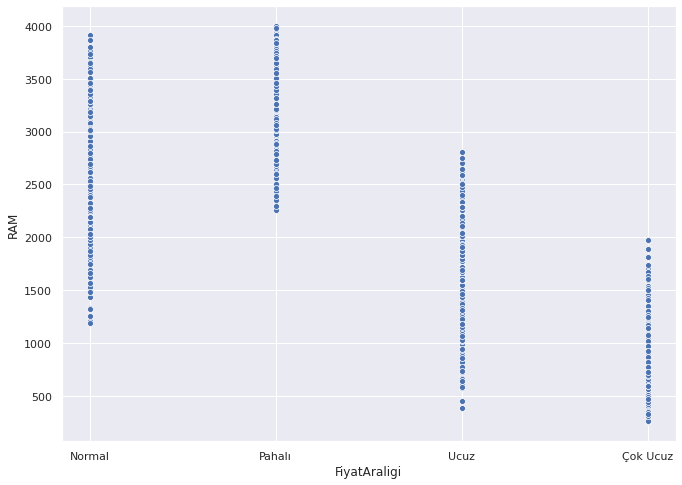

In [86]:
sns.set(rc={'figure.figsize':(11,8)}) # Oluşacak grafiklerin uzunluğunu ve genişliğini belirleyelim.

sns.scatterplot(df["FiyatAraligi"], df["RAM"]);

In [87]:
df.drop(["Bluetooth","CiftHat","4G","3G" ,"WiFi" ,"Renk","Dokunmatik" ], axis = 1, inplace = True) #sayısal olmayan değişkenleri kaldırdık.

In [88]:
X = df.drop("FiyatAraligi", axis = 1)
y = df["FiyatAraligi"]

Veri çerçevemizi bağımlı ve bağımsız değişkenler olmak üzere ikiye ayıralım.

In [89]:
X #Bağımsız değişkenlerimizi yazdıralım.

BataryaGucu  MikroislemciHizi  OnKameraMP  DahiliBellek  Kalinlik  \
0            1325               1.9         2.0            50       0.1   
1            1046               2.8         0.0            58       0.2   
2             843               1.3         1.0            16       0.9   
3             894               0.5         1.0            50       0.5   
4             936               1.0         1.0            18       0.2   
...           ...               ...         ...           ...       ...   
1995          689               2.9         3.0             7       0.8   
1996         1654               1.8         1.0            11       0.3   
1997          742               2.2         4.0            56       0.2   
1998          704               2.2         4.0            53       0.2   
1999         1872               0.5         5.0            26       0.5   

      Agirlik  CekirdekSayisi  ArkaKameraMP  CozunurlukYükseklik  \
0         146               1            10                  499   
1         100               8             0                  259   
2         119               7             4                  593   
3         199               3            14                 1285   
4         153               3            18                 1330   
...       ...             ...           ...                  ...   
1995      147               2             6                  487   
1996      146               7             2                 1184   
1997      190               7            14                  577   
1998      186               6             6                  251   
1999      172               4            10                  672   

      CozunurlukGenislik     RAM  BataryaOmru  
0                    695  2328.0            2  
1                   1040  3863.0            9  
2                    732  1734.0           14  
3                   1462  3615.0            6  
4                   1686  2391.0            3  
...                  ...     ...          ...  
1995                 722  1241.0           16  
1996                1719  1070.0           14  
1997                1359  3557.0           12  
1998                1013  3653.0           15  
1999                1088  2273.0            8  

[2000 rows x 12 columns]

In [90]:
y #Bağımlı değişkenimizi yazdıralım.

0         Normal
1         Pahalı
2           Ucuz
3         Pahalı
4         Normal
          ...   
1995    Çok Ucuz
1996        Ucuz
1997      Pahalı
1998      Normal
1999      Normal
Name: FiyatAraligi, Length: 2000, dtype: object

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 3512, shuffle=1)

In [92]:
X_test.head()

BataryaGucu  MikroislemciHizi  OnKameraMP  DahiliBellek  Kalinlik  \
1153         1829               2.1         8.0            59       0.1   
894          1481               2.0         0.0            35       0.5   
724           769               0.5        12.0            54       0.2   
1020          635               0.5         2.0            42       0.4   
1717          668               2.9         7.0            30       0.2   

      Agirlik  CekirdekSayisi  ArkaKameraMP  CozunurlukYükseklik  \
1153       91               5            15                 1457   
894       105               3             0                  249   
724       112               4            19                 1385   
1020      149               3             4                  300   
1717      195               8            12                  522   

      CozunurlukGenislik     RAM  BataryaOmru  
1153                1919  3142.0            5  
894                  522  2635.0            4  
724                 1780   941.0           20  
1020                1059  2973.0           18  
1717                1056  2399.0            7

In [93]:
y_test.head()

1153      Pahalı
894       Normal
724     Çok Ucuz
1020      Normal
1717        Ucuz
Name: FiyatAraligi, dtype: object

GaussianNB modeli yaratarak eğitimi gerçekleştirelim.

In [94]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)

In [95]:
nb_model #Modelin alabileceği parametreleri görüntüledik.

GaussianNB()

In [96]:
dir(nb_model) #Model üzerinde yazılabilecek tüm komutları görüntüledik.

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_X',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_joint_log_likelihood',
 '_more_tags',
 '_partial_fit',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_update_mean_variance',
 '_validate_data',
 'class_count_',
 'class_prior_',
 'classes_',
 'epsilon_',
 'fit',
 'get_params',
 'n_features_in_',
 'partial_fit',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'priors',
 'score',
 'set_params',
 'sigma_',
 'theta_',
 'var_smoothing']

In [97]:
X_test[0:10]#Modelin eğitiminde kullanılmayan kısım olan X_test'in ilk 10 gözleminin ait olduğu türü tahmin ettirmeye çalıştık.

BataryaGucu  MikroislemciHizi  OnKameraMP  DahiliBellek  Kalinlik  \
1153         1829               2.1         8.0            59       0.1   
894          1481               2.0         0.0            35       0.5   
724           769               0.5        12.0            54       0.2   
1020          635               0.5         2.0            42       0.4   
1717          668               2.9         7.0            30       0.2   
1984         1372               2.7         7.0            34       0.4   
417          1358               0.5        11.0            36       0.3   
333           922               0.7         0.0            47       1.0   
771          1590               1.9         3.0            21       1.0   
1611         1472               3.0         4.0            20       0.3   

      Agirlik  CekirdekSayisi  ArkaKameraMP  CozunurlukYükseklik  \
1153       91               5            15                 1457   
894       105               3             0                  249   
724       112               4            19                 1385   
1020      149               3             4                  300   
1717      195               8            12                  522   
1984      193               4            17                  687   
417       155               4            14                 1565   
333       157               8            14                 1295   
771       160               5            18                  920   
1611      169               2             6                  443   

      CozunurlukGenislik     RAM  BataryaOmru  
1153                1919  3142.0            5  
894                  522  2635.0            4  
724                 1780   941.0           20  
1020                1059  2973.0           18  
1717                1056  2399.0            7  
1984                 937   725.0           20  
417                 1858  3068.0            4  
333                 1808  1464.0           12  
771                  963  1701.0            4  
1611                 892   797.0           11

In [98]:
nb_model.predict(X_test)[0:10]#Modelin tahmin ettiği X_test gözlemlerinin ilk 10 tanesine baktık.

array(['Pahalı', 'Normal', 'Ucuz', 'Normal', 'Normal', 'Çok Ucuz',
       'Pahalı', 'Ucuz', 'Ucuz', 'Çok Ucuz'], dtype='<U8')

In [99]:
y_test[0:10]#Modele göstermediğimiz X_test gözlemlerinin ilk 10 cevabına baktığımızda bu değerlerin gerçek veriler olduğunu görürüz.

1153      Pahalı
894       Normal
724     Çok Ucuz
1020      Normal
1717        Ucuz
1984    Çok Ucuz
417       Pahalı
333         Ucuz
771         Ucuz
1611    Çok Ucuz
Name: FiyatAraligi, dtype: object

In [100]:
y_pred = nb_model.predict(X_test)#y_pred isimli değişken oluşturup tüm X_test gözlemlerinin tahmin sonucunu atayalım.
y_pred

array(['Pahalı', 'Normal', 'Ucuz', 'Normal', 'Normal', 'Çok Ucuz',
       'Pahalı', 'Ucuz', 'Ucuz', 'Çok Ucuz', 'Normal', 'Normal', 'Ucuz',
       'Çok Ucuz', 'Pahalı', 'Pahalı', 'Pahalı', 'Pahalı', 'Pahalı',
       'Pahalı', 'Pahalı', 'Ucuz', 'Çok Ucuz', 'Ucuz', 'Ucuz', 'Pahalı',
       'Ucuz', 'Normal', 'Pahalı', 'Çok Ucuz', 'Ucuz', 'Çok Ucuz',
       'Çok Ucuz', 'Çok Ucuz', 'Normal', 'Pahalı', 'Ucuz', 'Ucuz',
       'Çok Ucuz', 'Çok Ucuz', 'Pahalı', 'Normal', 'Pahalı', 'Ucuz',
       'Çok Ucuz', 'Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Pahalı', 'Ucuz',
       'Çok Ucuz', 'Normal', 'Pahalı', 'Çok Ucuz', 'Pahalı', 'Çok Ucuz',
       'Pahalı', 'Pahalı', 'Ucuz', 'Pahalı', 'Ucuz', 'Çok Ucuz', 'Ucuz',
       'Çok Ucuz', 'Normal', 'Pahalı', 'Çok Ucuz', 'Çok Ucuz', 'Ucuz',
       'Normal', 'Çok Ucuz', 'Normal', 'Çok Ucuz', 'Çok Ucuz', 'Normal',
       'Pahalı', 'Normal', 'Normal', 'Çok Ucuz', 'Normal', 'Normal',
       'Ucuz', 'Pahalı', 'Ucuz', 'Pahalı', 'Pahalı', 'Normal', 'Ucuz',
       'Pahalı',

In [101]:
y_test

1153      Pahalı
894       Normal
724     Çok Ucuz
1020      Normal
1717        Ucuz
          ...   
1433        Ucuz
580         Ucuz
873       Normal
139         Ucuz
349       Pahalı
Name: FiyatAraligi, Length: 500, dtype: object

In [102]:
accuracy_score(y_test, y_pred)#Doğruluk skorunu görüntüledik.

0.816

In [103]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)#Karmaşıklık matrisini görüntüledik.
print(karmasiklik_matrisi)

[[ 73  15  15   0]
 [ 12 119   0   0]
 [ 32   0  90  10]
 [  0   0   8 126]]


Karmaşıklık matris skorunu(accuracy) hesaplayalım.

In [104]:
(karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1]) / (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1] +  karmasiklik_matrisi[1][0] + karmasiklik_matrisi[0][1])

0.8767123287671232

Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım. Yani 10 kez katlamalı çapraz doğrulama yapalım.

In [105]:
cross_val_score(nb_model, X_test, y_test, cv = 10)

array([0.82, 0.72, 0.86, 0.78, 0.78, 0.82, 0.74, 0.88, 0.8 , 0.76])

Ortalamalarını alalım.

In [106]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.796

Sınıflandırma raporu çizdirelim

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.62      0.71      0.66       103
      Pahalı       0.89      0.91      0.90       131
        Ucuz       0.80      0.68      0.73       132
    Çok Ucuz       0.93      0.94      0.93       134

    accuracy                           0.82       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.82      0.82      0.82       500



Kesinlik skorunu görüntüleyelim.

In [108]:
PrecisionScore = precision_score(y_test, y_pred, average='weighted')
PrecisionScore

0.8197611606936819

Yakalama (Recall) veya Hassaslık (Sensitivity) skorunu görüntüleyelim.

In [109]:
RecallScore = recall_score(y_test, y_pred, average='weighted')
RecallScore

0.816

F1 skorunu görüntüleyelim.

In [110]:
F1Score = f1_score(y_test, y_pred, average = 'weighted')  
F1Score

0.8161072682932521

In [111]:
X.columns

Index(['BataryaGucu', 'MikroislemciHizi', 'OnKameraMP', 'DahiliBellek',
       'Kalinlik', 'Agirlik', 'CekirdekSayisi', 'ArkaKameraMP',
       'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM', 'BataryaOmru'],
      dtype='object')

Modelin daha iyi doğruluk skoru vermesi için ne yapabiliriz? Feature Selection

In [112]:
len(X.columns) #kaç öznitelik olduğuna bakalım

12

In [113]:
from sklearn.feature_selection import *#Feature Selection yöntemi için Scikit-learn kütüphanesinde bulalım ve her bir bağımsız değişken için istatistik hesaplandıktan sonra filtreleme yapmamızı sağlayan KBest tekniğini kullanalım.

In [114]:
test = SelectKBest(k = 12)#k parametresi olarak 12 değişkenimiz olduğu için ve 12 tanesinin de skorlarını görüntülemek için 12 giriyoruz.
test

SelectKBest(k=12)

Bağımlı ve bağımsız değişkenleri oluşturduğumuz test nesnesine parametre olarak girelim ve eğitelim.

In [115]:
fit = test.fit(X, y)
fit

SelectKBest(k=12)

In [116]:
for indis, skor in enumerate(fit.scores_):#Tüm skorları görüntüledik.Daha iyi görüntülemek için de bir döngü yazdık ve karşılıklarına öznitelik isimlerini yazdırdık.
    print(skor, " -> ", X.columns[indis])

31.59815753989697  ->  BataryaGucu
0.49370780102890643  ->  MikroislemciHizi
0.7423048791241005  ->  OnKameraMP
2.9229960794178416  ->  DahiliBellek
1.5006824396689178  ->  Kalinlik
3.5943181851549952  ->  Agirlik
2.6254151540861677  ->  CekirdekSayisi
0.8254463576889531  ->  ArkaKameraMP
19.484841776704883  ->  CozunurlukYükseklik
22.620882490611052  ->  CozunurlukGenislik
3547.9679261399183  ->  RAM
1.6288113087357383  ->  BataryaOmru


Karar ağaçları için gerekli kütüphaneleri ekleyelim.

In [117]:
from sklearn.neighbors import KNeighborsClassifier 

In [118]:
knn = KNeighborsClassifier(n_neighbors=15) 
  
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=15)

In [119]:
print(knn.predict(X_test)) 

['Pahalı' 'Normal' 'Çok Ucuz' 'Normal' 'Ucuz' 'Çok Ucuz' 'Pahalı' 'Ucuz'
 'Ucuz' 'Çok Ucuz' 'Normal' 'Ucuz' 'Ucuz' 'Çok Ucuz' 'Pahalı' 'Pahalı'
 'Pahalı' 'Pahalı' 'Pahalı' 'Pahalı' 'Pahalı' 'Ucuz' 'Çok Ucuz' 'Ucuz'
 'Ucuz' 'Pahalı' 'Normal' 'Normal' 'Pahalı' 'Çok Ucuz' 'Ucuz' 'Çok Ucuz'
 'Çok Ucuz' 'Çok Ucuz' 'Ucuz' 'Pahalı' 'Ucuz' 'Çok Ucuz' 'Çok Ucuz'
 'Çok Ucuz' 'Pahalı' 'Normal' 'Pahalı' 'Ucuz' 'Çok Ucuz' 'Ucuz' 'Çok Ucuz'
 'Çok Ucuz' 'Pahalı' 'Ucuz' 'Çok Ucuz' 'Normal' 'Pahalı' 'Çok Ucuz'
 'Pahalı' 'Çok Ucuz' 'Pahalı' 'Pahalı' 'Ucuz' 'Pahalı' 'Çok Ucuz'
 'Çok Ucuz' 'Çok Ucuz' 'Çok Ucuz' 'Normal' 'Pahalı' 'Çok Ucuz' 'Çok Ucuz'
 'Ucuz' 'Normal' 'Çok Ucuz' 'Ucuz' 'Çok Ucuz' 'Çok Ucuz' 'Normal' 'Pahalı'
 'Normal' 'Pahalı' 'Ucuz' 'Normal' 'Normal' 'Ucuz' 'Pahalı' 'Ucuz'
 'Pahalı' 'Pahalı' 'Ucuz' 'Normal' 'Pahalı' 'Normal' 'Çok Ucuz' 'Çok Ucuz'
 'Normal' 'Normal' 'Çok Ucuz' 'Çok Ucuz' 'Çok Ucuz' 'Çok Ucuz' 'Pahalı'
 'Çok Ucuz' 'Çok Ucuz' 'Normal' 'Normal' 'Pahalı' 'Çok Ucuz' 'Pahalı'
 '

In [120]:
knn = KNeighborsClassifier(n_neighbors=15) ##Modelin doğruluğunu hesapladık.
  
knn.fit(X_train, y_train) 
  
print(knn.score(X_test, y_test))

0.93


In [121]:
neighbors = np.arange(2, 15) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

In [122]:
#K değerlerinin üzerinde dönen döngü 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Eğitim ve veri doğruluğunu test edelim.
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 

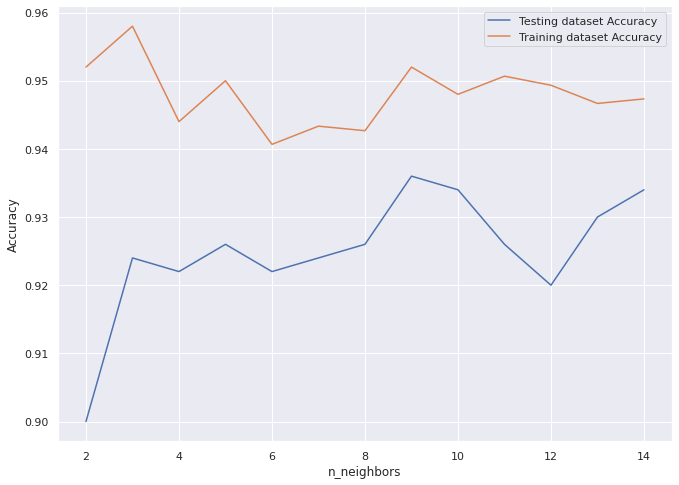

In [123]:
# Grafiği çizelim.
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

In [124]:
 def importdata(): 
    balance_data = pd.read_csv('../input/tablet/tablet.csv', sep= ',', header = None) 
   
    print("Dataset Length: ", len(balance_data)) 
    print("Dataset Shape: ", balance_data.shape) 
      
   
    print("Dataset: ",balance_data.head()) 
    return balance_data 

In [125]:
def splitdataset(balance_data): 
  
    # Separating the target variable 
    X = balance_data.values[:, 2:15] 
    Y = balance_data.values[:, 0] 
  
    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.25, random_state = 100) 
      
    return X, Y, X_train, X_test, y_train, y_test 

In [126]:
 def train_using_gini(X_train, X_test, y_train): 
  
    
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=2, min_samples_leaf=15) 
  
    
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

In [127]:
 
def tarin_using_entropy(X_train, X_test, y_train): 
  
  
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 2, min_samples_leaf = 15) 
  
    
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

In [128]:
 
def prediction(X_test, clf_object): 
  
     
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

In [129]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 

In [130]:
def main(): 
      
    
    data = importdata() 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
      
   
    print("Results Using Gini Index:") 
      
    
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
      
    print("Results Using Entropy:") 
    
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy) 

In [131]:
if __name__=="__main__": 
    main() 

FileNotFoundError: [Errno 2] File ../input/tablet/tablet.csv does not exist: '../input/tablet/tablet.csv'